In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
%matplotlib inline

In [2]:
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams.update({'font.size': 20})

In [3]:
def stateThresholds():
    return {'mz':[179.928,592.86]
            ,'u':[4322.72,15365.41],
            'h':[126.85,381.53],
            'A':[163.02,385.53]}

In [4]:
def getStates(df_res,thresh):
            
    E = (df_res['u']>thresh['u'][1])*(df_res['mz']<=thresh['mz'][0])
    M = (df_res['u']<=thresh['u'][0])*(df_res['mz']>thresh['mz'][1])
    EM =(df_res['u']>thresh['u'][0])*(df_res['u']<=thresh['u'][1])*(df_res['mz']>thresh['mz'][0])*(df_res['mz']<=thresh['mz'][1])
    
    
    O = (df_res['A']>thresh['A'][1])*(df_res['h']<=thresh['h'][0])
    W = (df_res['A']<=thresh['A'][0])*(df_res['h']>thresh['h'][1])
    WO =(df_res['A']>thresh['A'][0])*(df_res['A']<=thresh['A'][1])*(df_res['h']>thresh['h'][0])*(df_res['h']<=thresh['h'][1])
    
    results={'E/O':np.sum(E*O),'E/WO':np.sum(E*WO),'E/W':np.sum(E*W),
             'M/O':np.sum(M*O),'M/WO':np.sum(M*WO),'M/W':np.sum(M*W),
             'EM/O':np.sum(EM*O),'EM/WO':np.sum(EM*WO),'EM/W':np.sum(EM*W),
             'E':np.sum(E),'EM':np.sum(EM),'M':np.sum(M),
             'O':np.sum(O),'WO':np.sum(WO),'W':np.sum(W)}
    
    maxV = np.max(results.values())
    return results,maxV

In [5]:
def plotValuesEMTvMR(df,thresholds):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,11))
    plt.subplots_adjust(hspace=0.2,wspace=0.5)

    labels={"u":"$\mu_{200}$",'mz':'Zeb mNRA','A':'AMPK','h':'Hif-1'}
    x1L = 'u'
    x2L = 'A'
    y1L='h'
    y2L='mz'

    x1v=np.arange(math.floor(np.min(df[x1L].values))-1000, math.ceil(np.max(df[x1L].values))+1000)
    y1v=np.arange(math.floor(np.min(df[y1L].values))-100, math.ceil(np.max(df[y1L].values))+100)
    x2v=np.arange(math.floor(np.min(df[x2L].values))-100, math.ceil(np.max(df[x2L].values))+100)
    y2v=np.arange(math.floor(np.min(df[y2L].values))-100, math.ceil(np.max(df[y2L].values))+100)
    y1a= thresholds[y1L][0]
    y1b= thresholds[y1L][1]
    x1a= thresholds[x1L][0]
    x1b= thresholds[x1L][1]

    y2a= thresholds[y2L][0]
    y2b=thresholds[y2L][1]
    x2a= thresholds[x2L][0]
    x2b= thresholds[x2L][1]
    
    ax1.plot(df[x1L].values,df[y1L].values,"ko",markersize=10)
    ax2.plot(df[x2L].values,df[y2L].values,"ko",markersize=10)
    

    
    ax1.fill_between(x1v,y1a, y1b,facecolor='red',alpha=0.4)#
    ax1.fill_betweenx(y1v,x1a, x1b,facecolor='blue',alpha=0.4)#
    ax1.set_xlabel(labels[x1L])
    ax1.set_ylabel(labels[y1L])

    ax2.fill_between(x2v,y2a, y2b,facecolor='red',alpha=0.4)#
    ax2.fill_betweenx(y2v,x2a, x2b,facecolor='blue',alpha=0.4)#
    ax2.set_xlabel(labels[x2L])
    ax2.set_ylabel(labels[y2L])

    ax1.set_xlim(np.min(x1v),np.max(x1v))
    ax1.set_ylim(np.min(y1v),np.max(y1v))
    ax2.set_xlim(np.min(x2v),np.max(x2v))
    ax2.set_ylim(np.min(y2v),np.max(y2v))

    plt.text(.1, 1.05 , 'M', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(.35, 1.05 , 'EM', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(.7, 1.05 , 'E', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(1.05,.8, 'M', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
    plt.text(1.05,.4, 'EM', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
    plt.text(1.05,.1, 'E', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)


    plt.text(1.05,.8, 'W', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(1.05,.5, 'WO', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(1.05,.1, 'O', horizontalalignment='center',verticalalignment='center', transform=ax1.transAxes)
    plt.text(.2, 1.05 , 'W', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
    plt.text(.55, 1.05 , 'WO', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)
    plt.text(.85, 1.05 , 'O', horizontalalignment='center',verticalalignment='center', transform=ax2.transAxes)

    plt.show()


In [6]:
def plotCoupled(results):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize=(30,30))
    plt.subplots_adjust(hspace=0.3)
    
    ax1.bar(np.arange(0,len(results['E/O'][0])),results['E/O'][1],yerr =results['E/O'][2])#, width=100)#,'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax2.bar(np.arange(0,len(results['E/WO'][0])),results['E/WO'][1],yerr =results['E/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax3.bar(np.arange(0,len(results['E/W'][0])),results['E/W'][1],yerr =results['E/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax4.bar(np.arange(0,len(results['EM/O'][0])),results['EM/O'][1],yerr =results['EM/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax5.bar(np.arange(0,len(results['EM/WO'][0])),results['EM/WO'][1],yerr =results['EM/WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax6.bar(np.arange(0,len(results['EM/W'][0])),results['EM/W'][1],yerr =results['EM/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax7.bar(np.arange(0,len(results['M/O'][0])),results['M/O'][1],yerr =results['M/O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax8.bar(np.arange(0,len(results['M/WO'][0])),results['M/WO'][1],yerr =results['M/WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax9.bar(np.arange(0,len(results['M/W'][0])),results['M/W'][1],yerr =results['M/W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
        
    ax1.set_xticks(np.arange(0,len(results['E/O'][0])))
    ax2.set_xticks(np.arange(0,len(results['E/WO'][0])))
    ax3.set_xticks(np.arange(0,len(results['E/W'][0])))
    ax4.set_xticks(np.arange(0,len(results['EM/O'][0])))
    ax5.set_xticks(np.arange(0,len(results['EM/WO'][0])))
    ax6.set_xticks(np.arange(0,len(results['EM/W'][0])))
    ax7.set_xticks(np.arange(0,len(results['M/O'][0])))
    ax8.set_xticks(np.arange(0,len(results['M/WO'][0])))
    ax9.set_xticks(np.arange(0,len(results['M/W'][0])))
    ax1.set_xticklabels(results['E/O'][0],rotation=30)
    ax2.set_xticklabels(results['E/WO'][0],rotation=30)
    ax3.set_xticklabels(results['E/W'][0],rotation=30)
    ax4.set_xticklabels(results['EM/O'][0],rotation=30)
    ax5.set_xticklabels(results['EM/WO'][0],rotation=30)
    ax6.set_xticklabels(results['EM/W'][0],rotation=30)
    ax7.set_xticklabels(results['M/O'][0],rotation=30)
    ax8.set_xticklabels(results['M/WO'][0],rotation=30)
    ax9.set_xticklabels(results['M/W'][0],rotation=30)
    
    ax1.set_xlabel("Initial Conditions")#"Steady state")
    ax2.set_xlabel("Initial Conditions")#"Steady state")
    ax3.set_xlabel("Initial Conditions")#"Steady state")
    ax4.set_xlabel("Initial Conditions")#"Steady state")
    ax5.set_xlabel("Initial Conditions")#"Steady state")
    ax6.set_xlabel("Initial Conditions")#"Steady state")
    ax7.set_xlabel("Initial Conditions")#"Steady state")
    ax8.set_xlabel("Initial Conditions")#"Steady state")
    ax9.set_xlabel("Initial Conditions")#"Steady state")
    ax1.set_ylabel("Percentage SS ")
    ax2.set_ylabel("Percentage SS ")
    ax3.set_ylabel("Percentage SS ")
    ax4.set_ylabel("Percentage SS ")
    ax5.set_ylabel("Percentage SS ")
    ax6.set_ylabel("Percentage SS ")
    ax7.set_ylabel("Percentage SS ")
    ax8.set_ylabel("Percentage SS ")
    ax9.set_ylabel("Percentage SS ")
    ax1.set_title("E/O")
    ax2.set_title("E/WO")
    ax3.set_title("E/W")
    ax4.set_title("EM/O")
    ax5.set_title("EM/WO")
    ax6.set_title("EM/W")
    ax7.set_title("M/O")
    ax8.set_title("M/WO")
    ax9.set_title("M/W")
    plt.show()
    fig.savefig('figures/comparison_coupledStates.png',bbox_inches='tight')    

In [7]:
def plotStateSum(results):
    fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(30,20))
    plt.subplots_adjust(hspace=0.3)
    
    ax1.bar(np.arange(0,len(results['E'][0])),results['E'][1],yerr =results['E'][2])#,width=100)#'*-',markersize=20,label=name)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax2.bar(np.arange(0,len(results['EM'][0])),results['EM'][1],yerr =results['EM'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax3.bar(np.arange(0,len(results['M'][0])),results['M'][1],yerr =results['M'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax4.bar(np.arange(0,len(results['O'][0])),results['O'][1],yerr =results['O'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax5.bar(np.arange(0,len(results['WO'][0])),results['WO'][1],yerr =results['WO'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
    ax6.bar(np.arange(0,len(results['W'][0])),results['W'][1],yerr =results['W'][2])#,width=100)#,'*-',markersize=20)#,color=my_cmap(my_norm(mapResE['amount']/nics)))
        
        
    ax1.set_xticks(np.arange(0,len(results['E'][0])))
    ax2.set_xticks(np.arange(0,len(results['EM'][0])))
    ax3.set_xticks(np.arange(0,len(results['M'][0])))
    ax4.set_xticks(np.arange(0,len(results['O'][0])))
    ax5.set_xticks(np.arange(0,len(results['WO'][0])))
    ax6.set_xticks(np.arange(0,len(results['W'][0])))
    ax1.set_xticklabels(results['E'][0],rotation=30)
    ax2.set_xticklabels(results['EM'][0],rotation=30)
    ax3.set_xticklabels(results['M'][0],rotation=30)
    ax4.set_xticklabels(results['O'][0],rotation=30)
    ax5.set_xticklabels(results['WO'][0],rotation=30)
    ax6.set_xticklabels(results['W'][0],rotation=30)
    
    ax1.set_xlabel("Initial Conditions")#"Steady state")
    ax2.set_xlabel("Initial Conditions")#"Steady state")
    ax3.set_xlabel("Initial Conditions")#"Steady state")
    ax4.set_xlabel("Initial Conditions")#"Steady state")
    ax5.set_xlabel("Initial Conditions")#"Steady state")
    ax6.set_xlabel("Initial Conditions")#"Steady state")
    ax1.set_ylabel("Percentage SS ")
    ax2.set_ylabel("Percentage SS ")
    ax3.set_ylabel("Percentage SS ")
    ax4.set_ylabel("Percentage SS ")
    ax5.set_ylabel("Percentage SS ")
    ax6.set_ylabel("Percentage SS ")
    ax1.set_title("E")
    ax2.set_title("EM")
    ax3.set_title("M")
    ax4.set_title("O")
    ax5.set_title("WO")
    ax6.set_title("W")
    plt.show()
    fig.savefig('figures/comparison_overallStates.png',bbox_inches='tight')

EMT_MR_comp_5_2000.png
EMT_MR_comp_3_500_res.txt


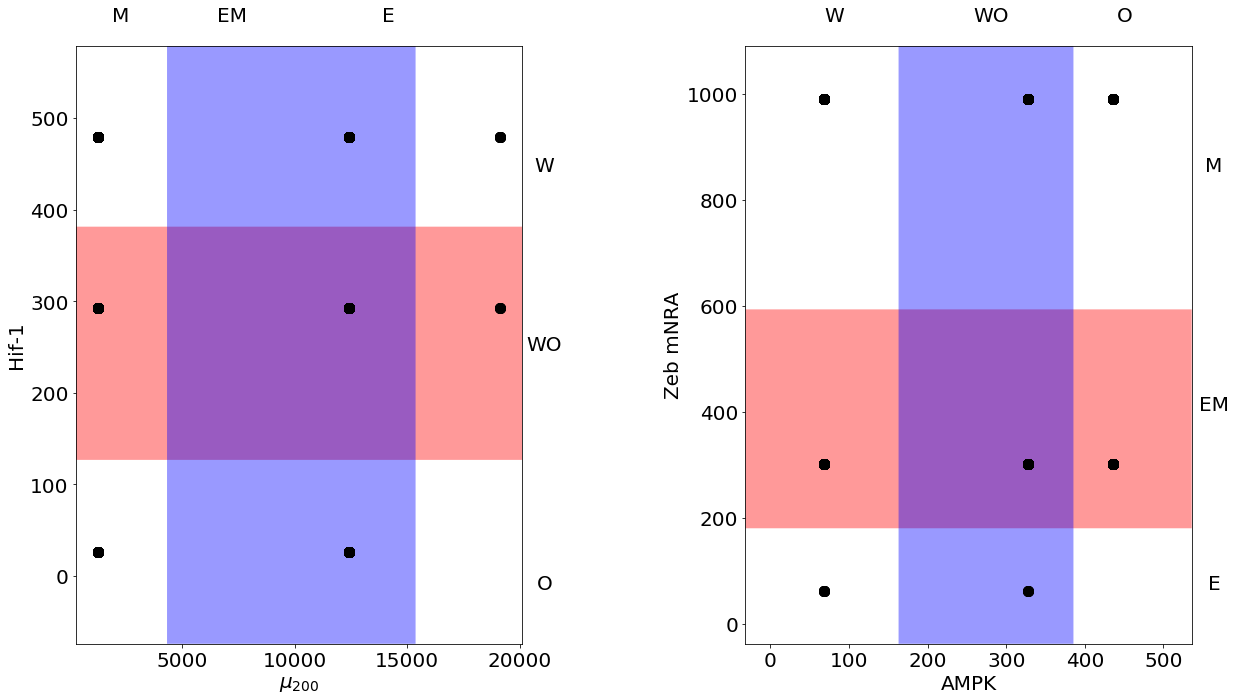

EMT_MR_comp_4_10000_ics.txt
EMT_MR_comp_3_5000_.png
EMT_MR_comp_9_2000_.png
EMT_MR_comp_6_10000_.png
EMT_MR_comp_3_5000_res.txt


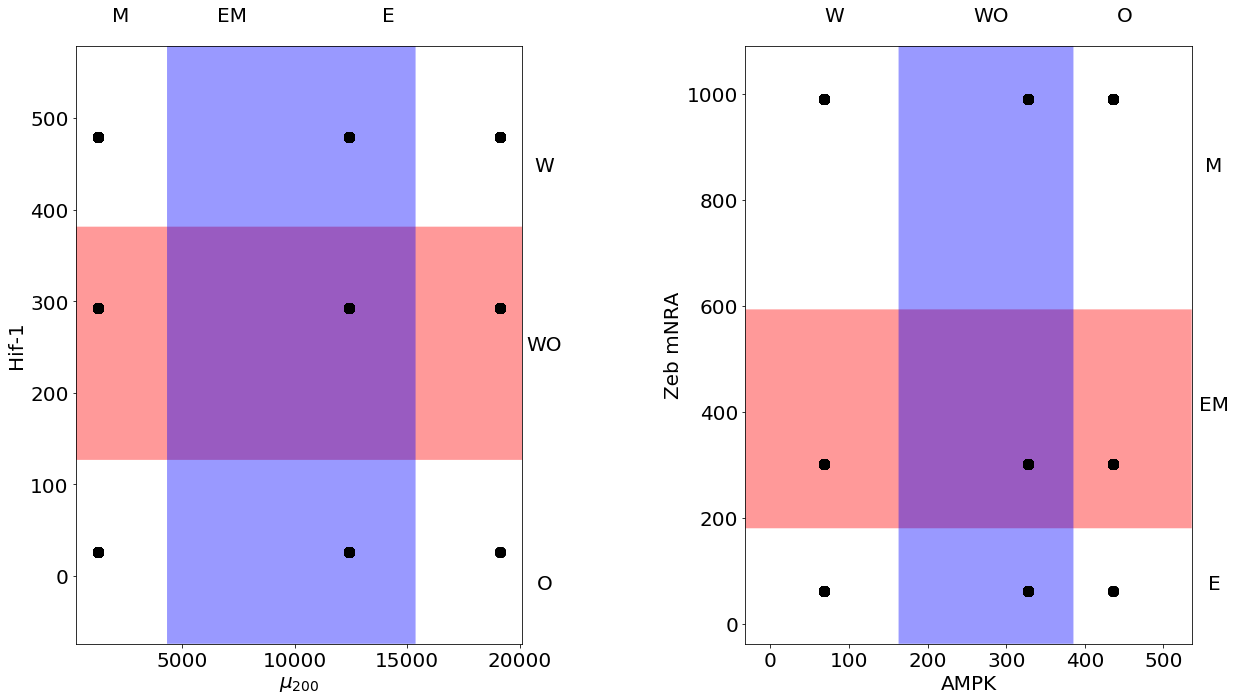

EMT_MR_comp_7_10000_.png
EMT_MR_comp_10_1000_.png
EMT_MR_comp_4_1000_ics.txt
EMT_MR_comp_10_1000_res.txt


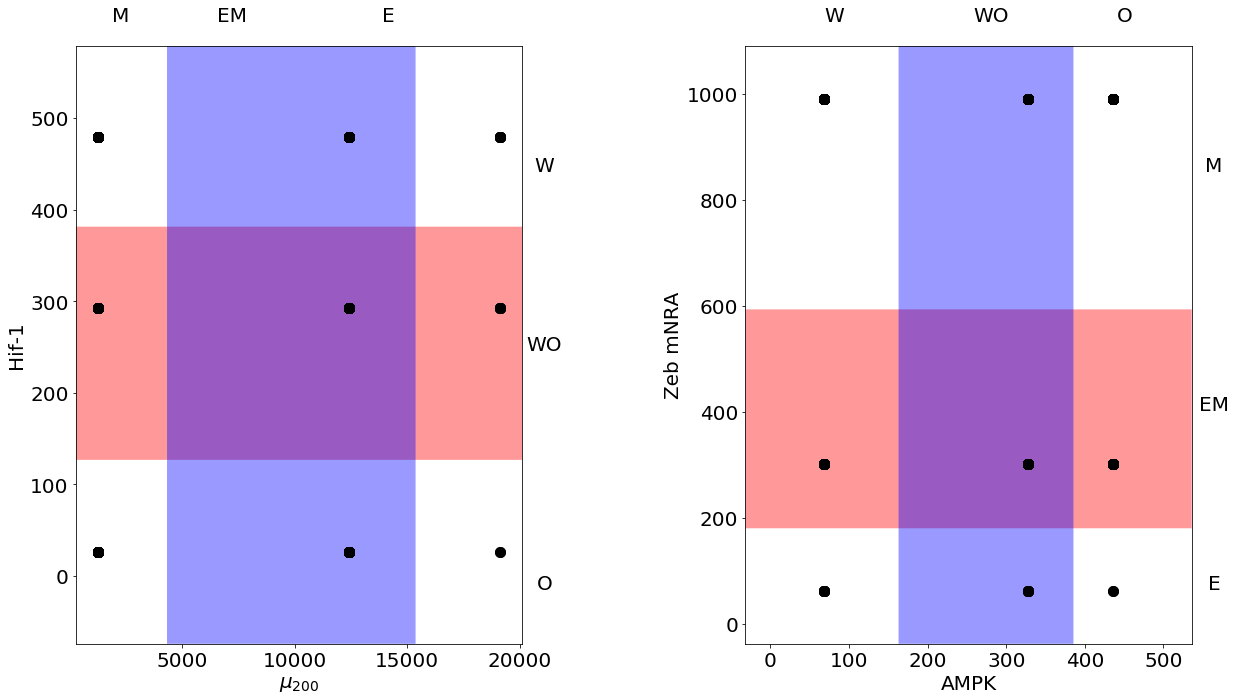

EMT_MR_comp_5_10000_res.txt


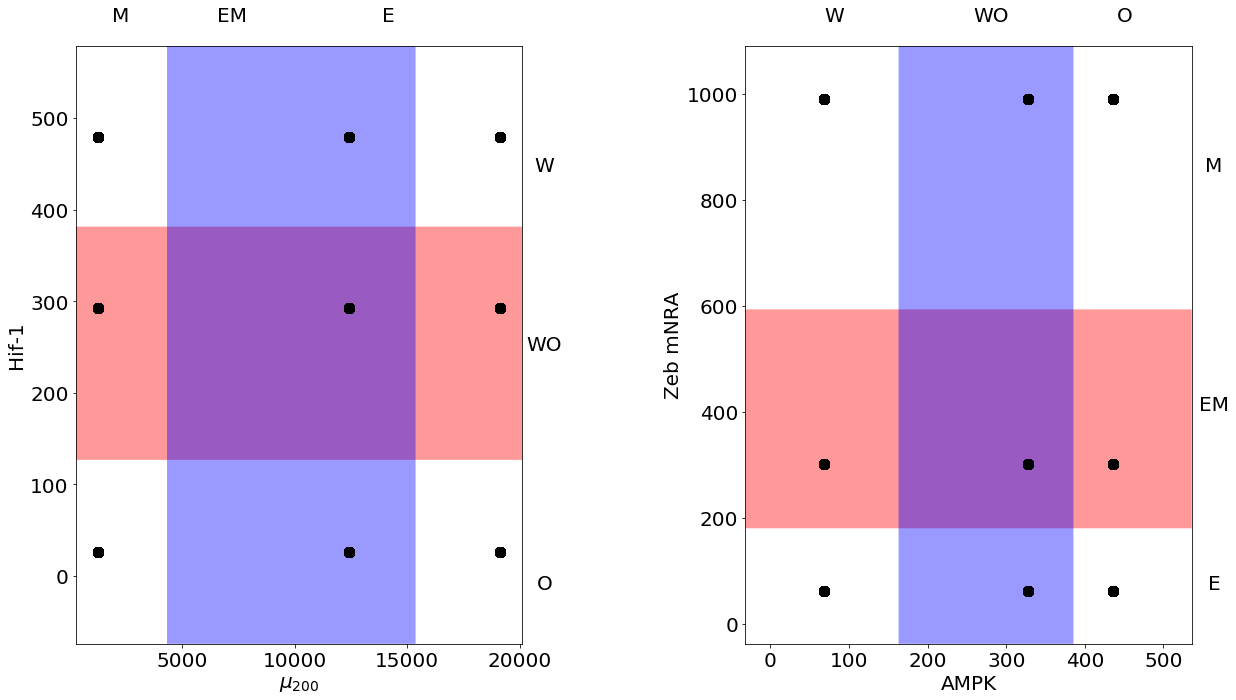

EMT_MR_comp_1_2000_ics.txt
EMT_MR_comp_0_2000_.png
EMT_MR_comp_6_2000_res.txt


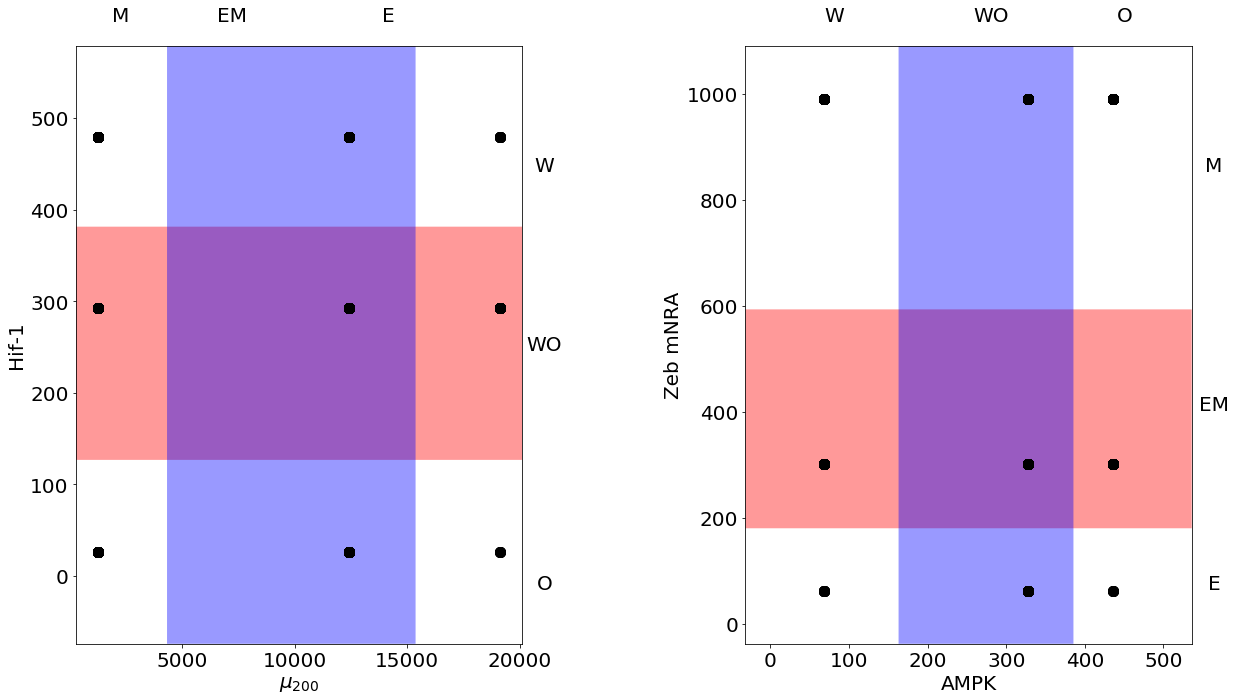

Makefile
EMT_MR_comp_9_100_res.txt


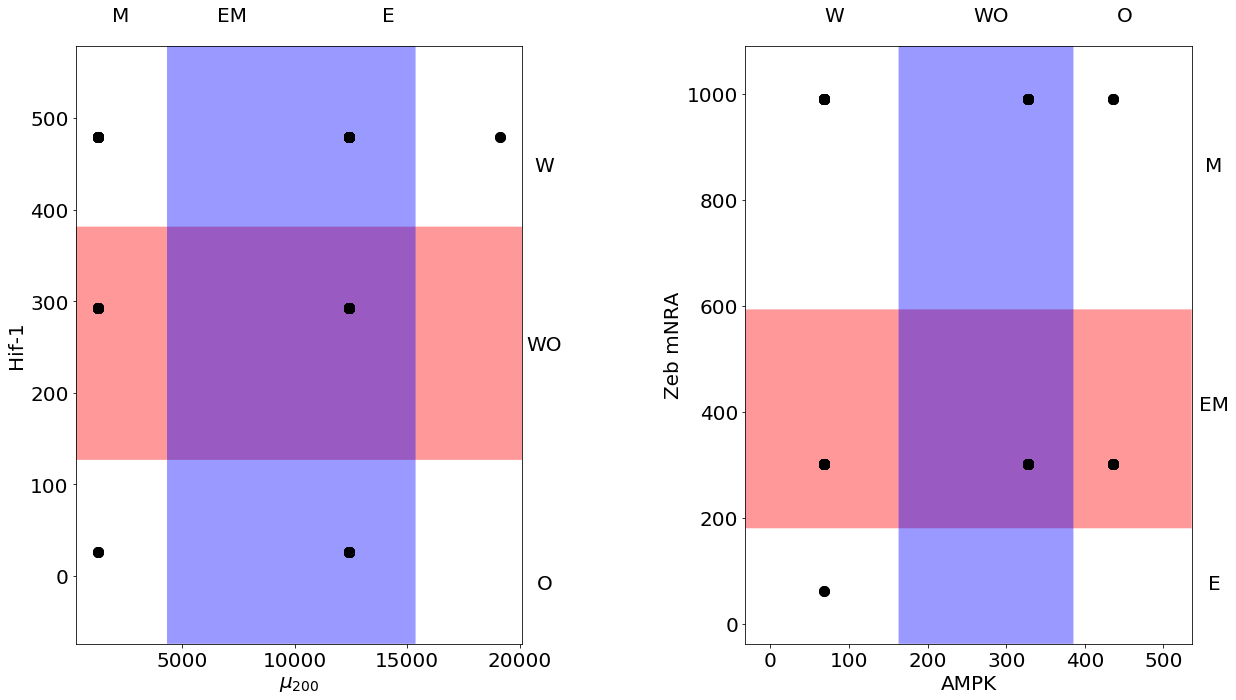

EMT_MR_comp_7_500_res.txt


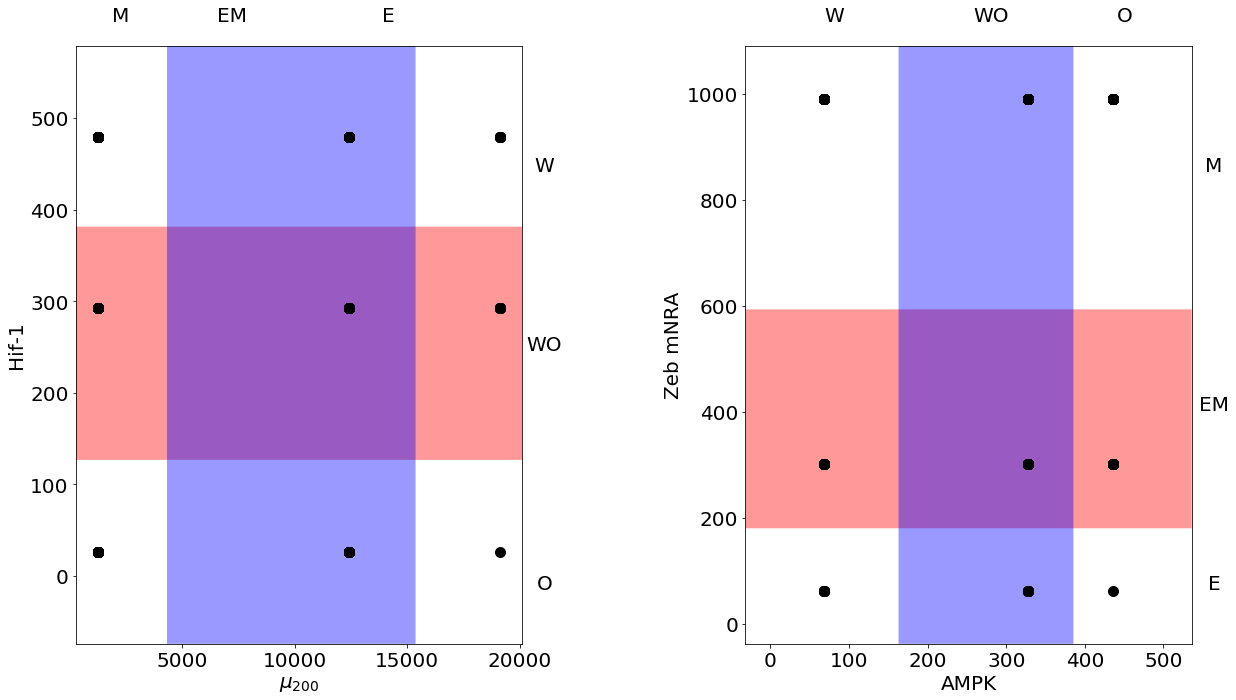

EMT_MR_comp_0_5000_ics.txt
EMT_MR_comp_3_500_ics.txt
EMT_MR_comp_2_5000.png
EMT_MR_comp_5_100_res.txt


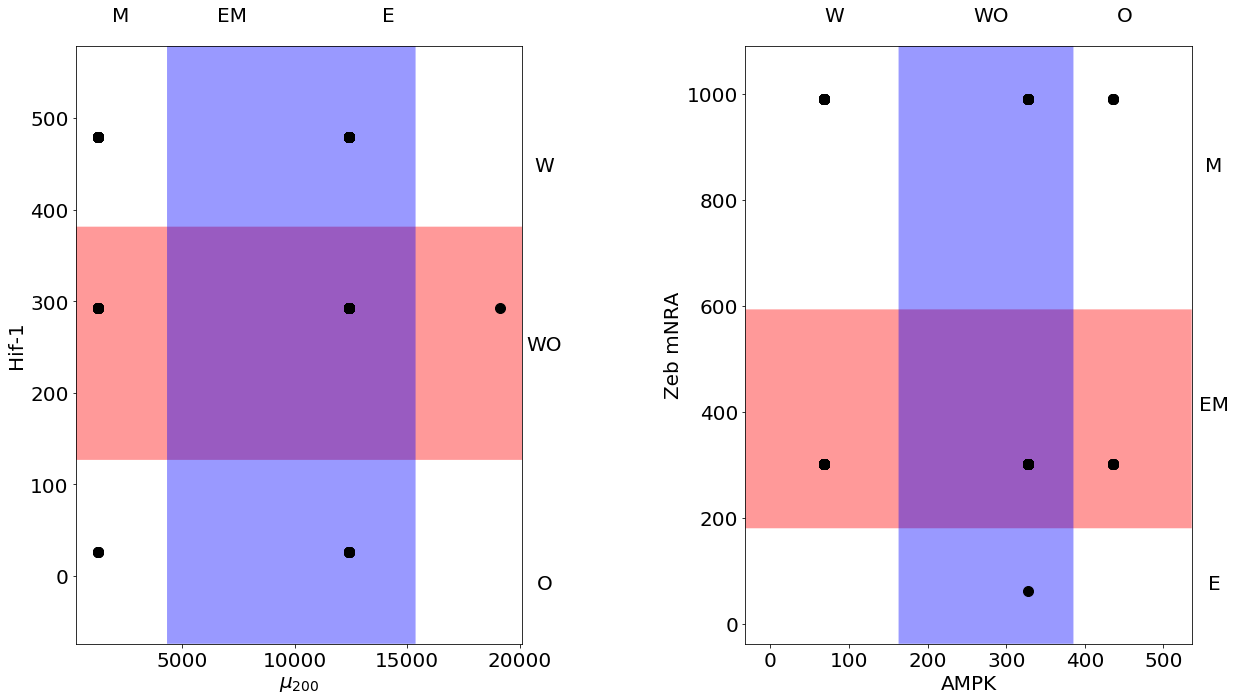

EMT_MR_comp_10_100_res.txt


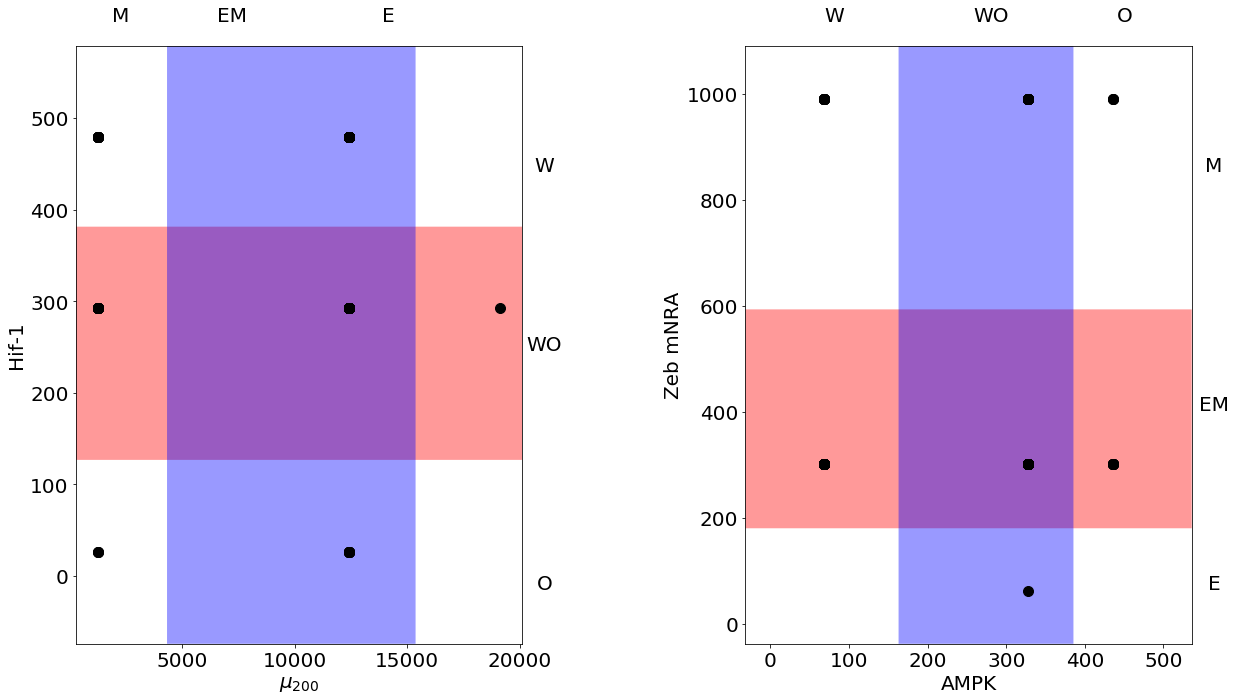

EMT_MR_comp_7_5000_ics.txt
EMT_MR_comp_0_2000_res.txt


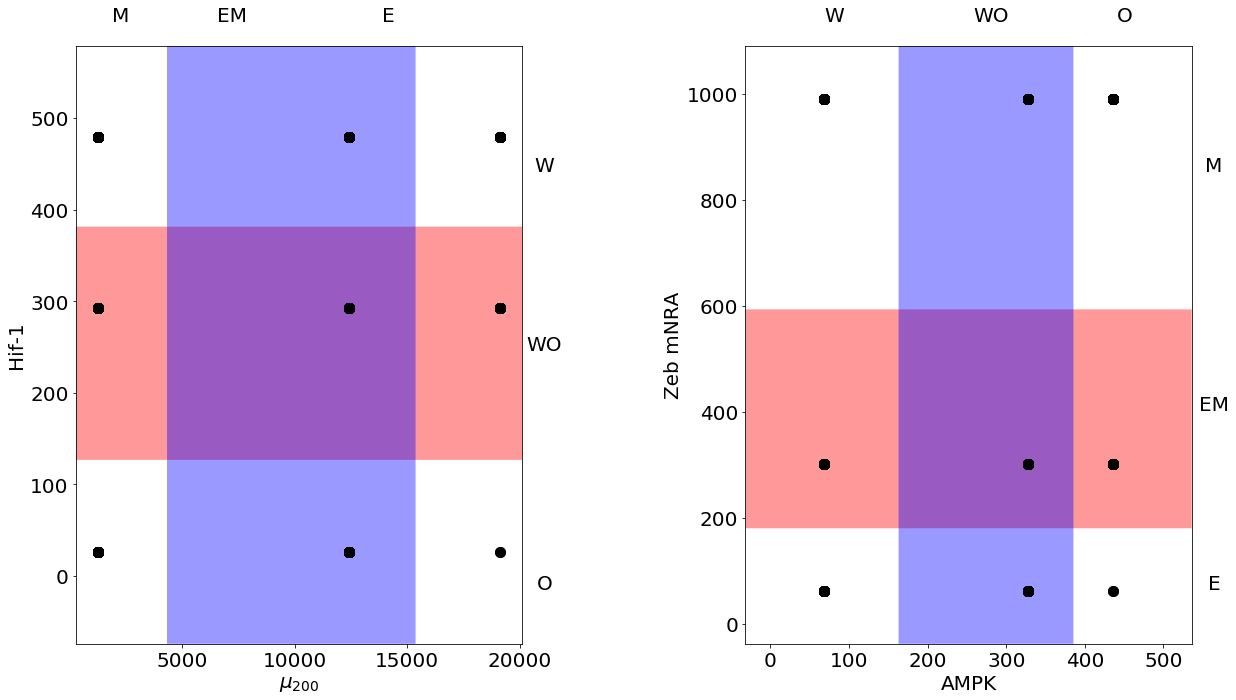

EMT_MR_comp_6_10000_ics.txt
EMT_MR_comp_9_500_res.txt


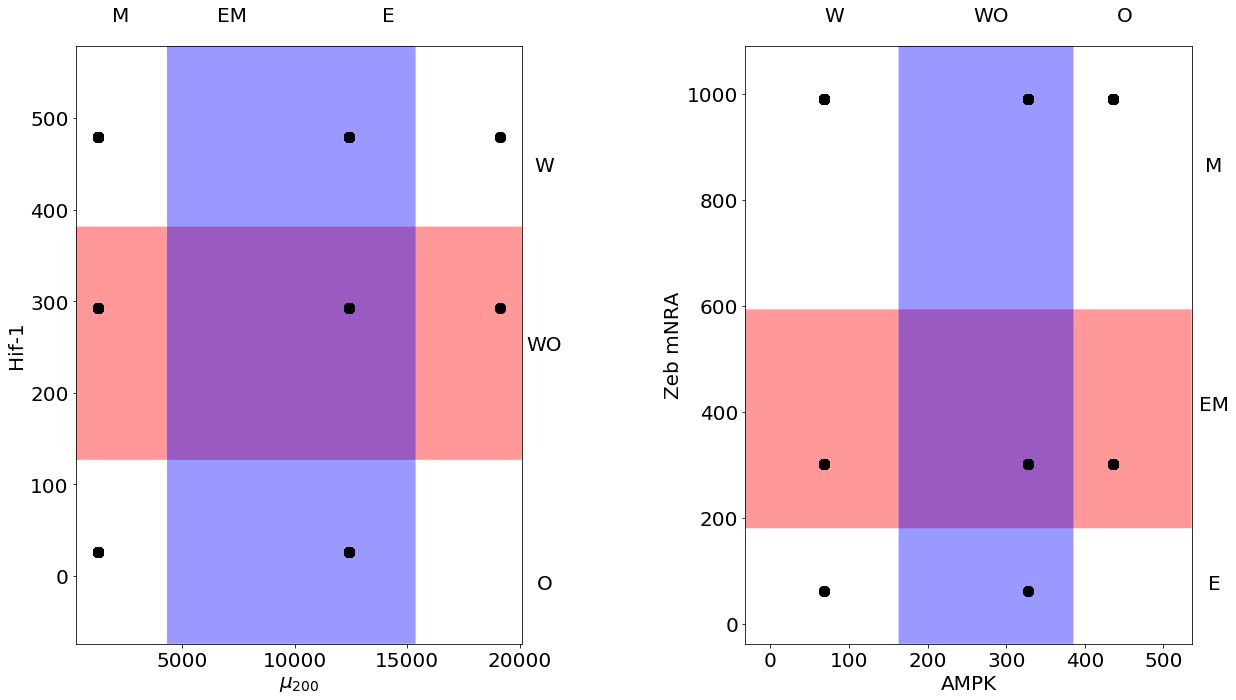

EMT_MR_comp_9_5000_ics.txt
EMT_MR_comp_4_100_ics.txt
EMT_MR_comp_4_5000_res.txt


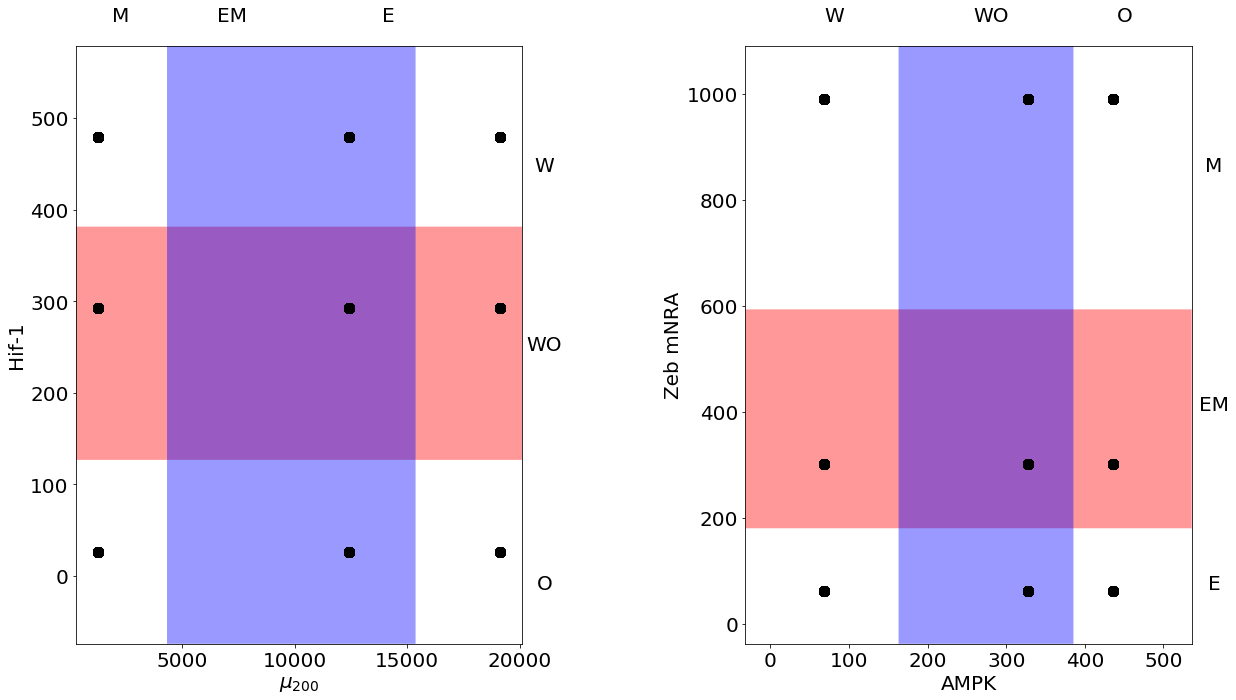

EMT_MR_comp_0_5000_.png
EMT_MR_comp_6_100_res.txt


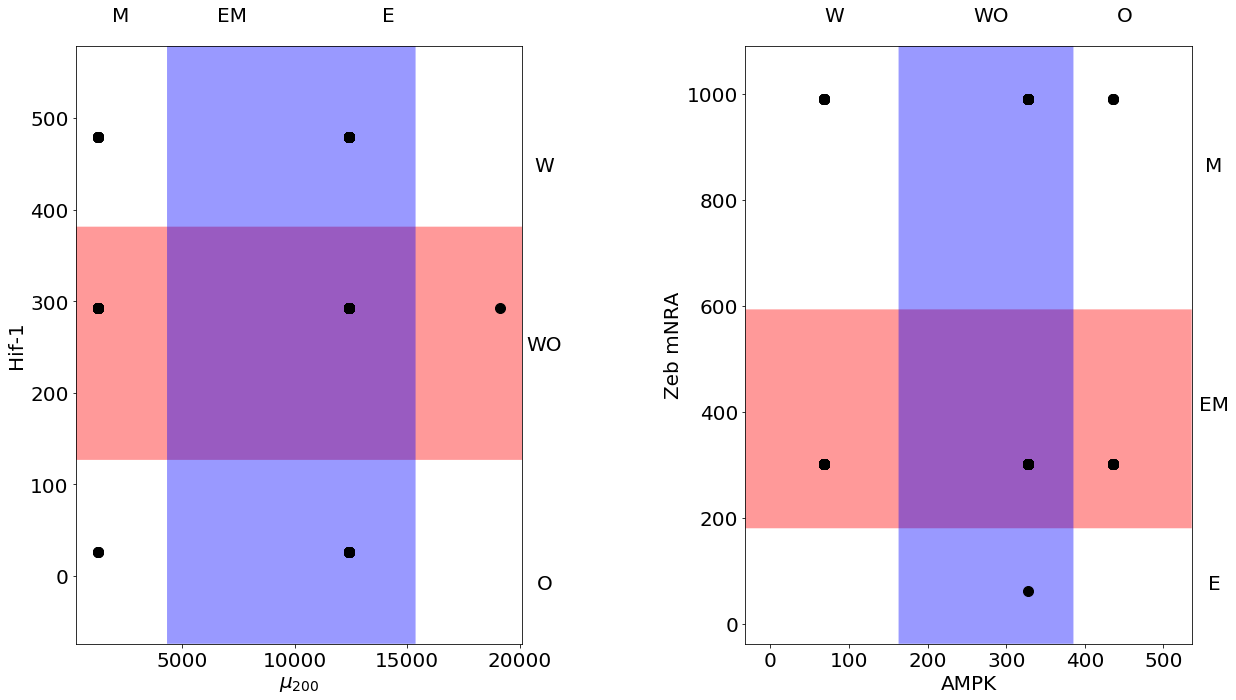

EMT_MR_comp_4_500_ics.txt
EMT_MR_comp_9_2000.png
EMT_MR_comp_5_10000_ics.txt
EMT_MR_comp_4_1000_res.txt


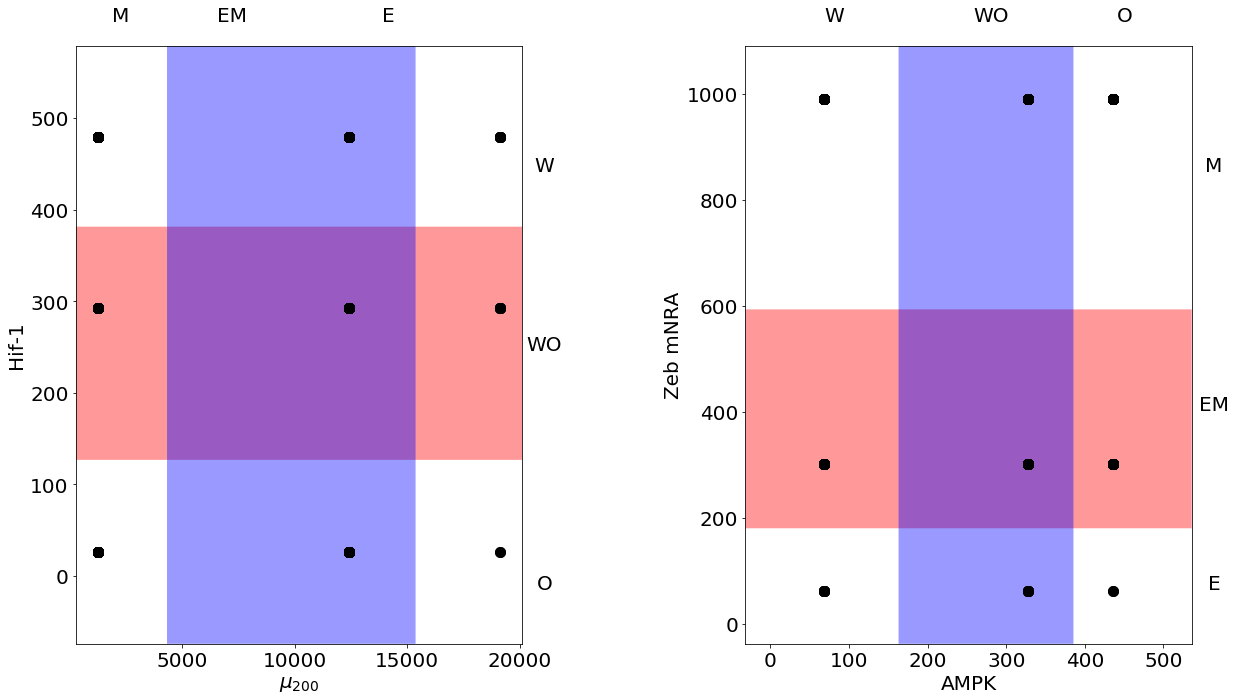

EMT_MR_comp_2_1000_.png
EMT_MR_comp_9_1000_.png
EMT_MR_comp_0_100_res.txt


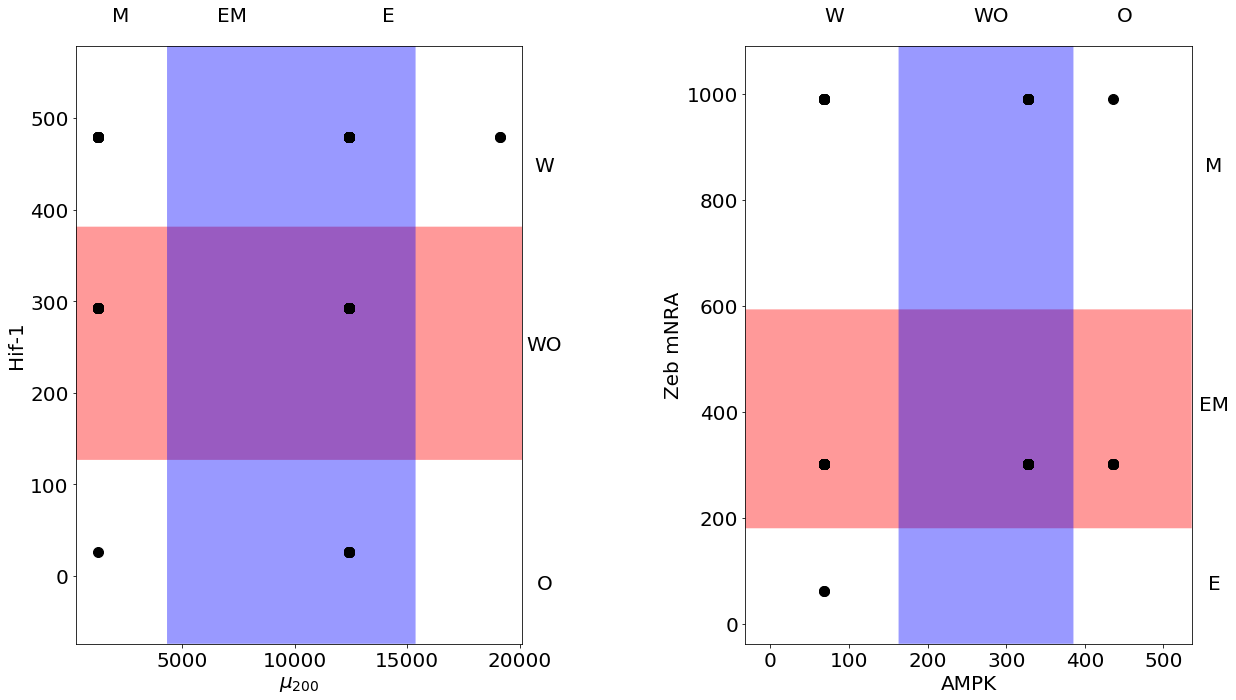

EMT_MR_comp_8_10000_res.txt


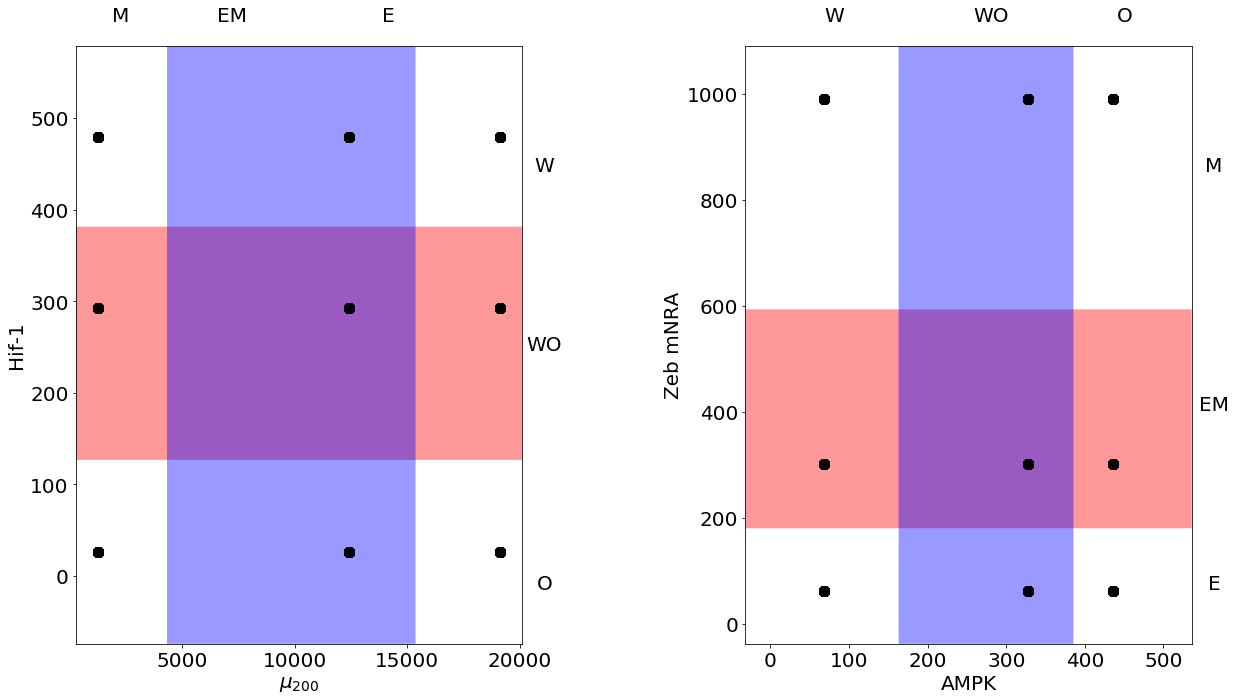

EMT_MR_comp_3_10000_.png
EMT_MR_comp_3_100_res.txt


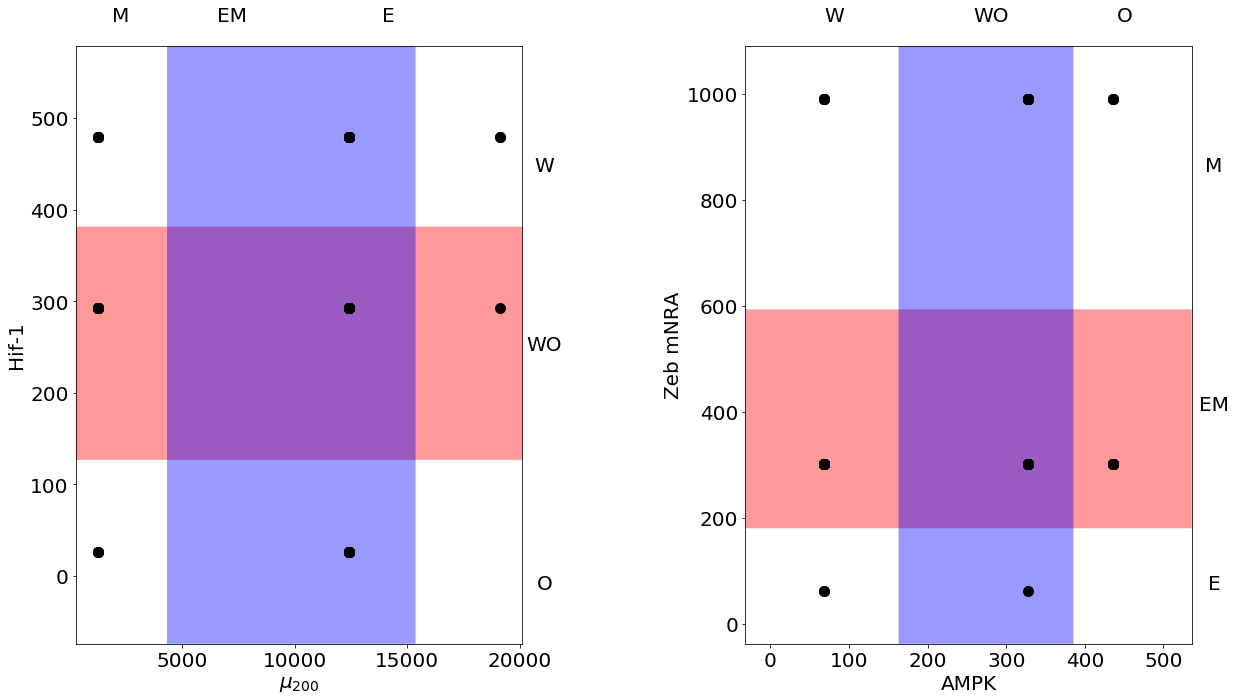

EMT_MR_comp_1_5000.png
EMT_MR_comp_3_5000.png
EMT_MR_comp_7_500_ics.txt
EMT_MR_comp_6_5000_.png
EMT_MR_comp_1_2000.png
EMT_MR_comp_10_2000.png
EMT_MR_comp_9_5000_.png
EMT_MR_comp_4_5000_.png
EMT_MR_comp_2_100_ics.txt
EMT_MR_comp_0_10000_ics.txt
EMT_MR_comp_2_10000_res.txt


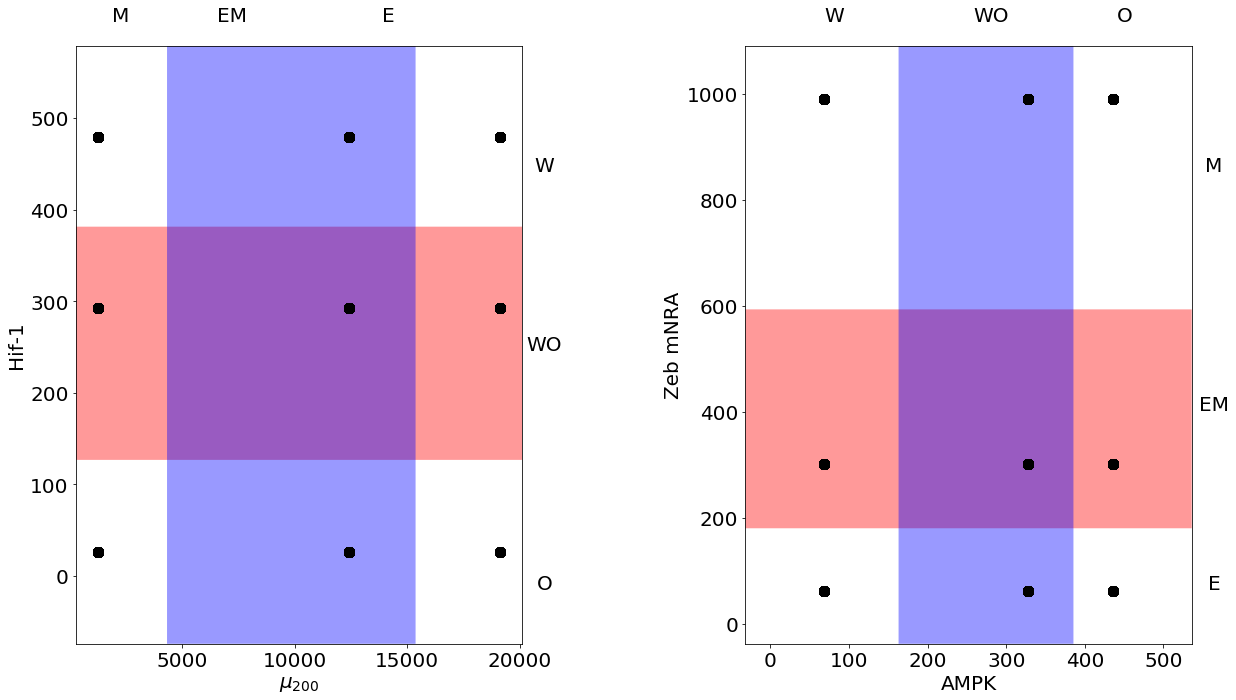

EMT_MR_comp_10_2000_res.txt


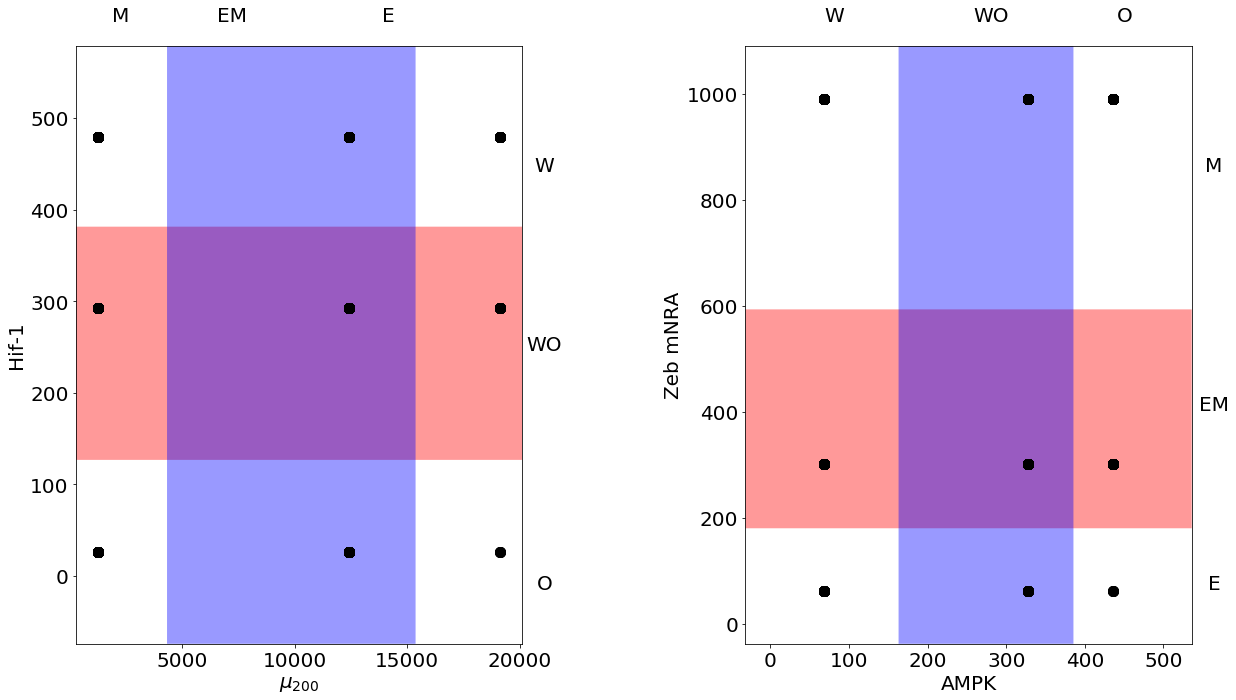

EMT_MR_comp_9_5000.png
EMT_MR_comp_0_5000_res.txt


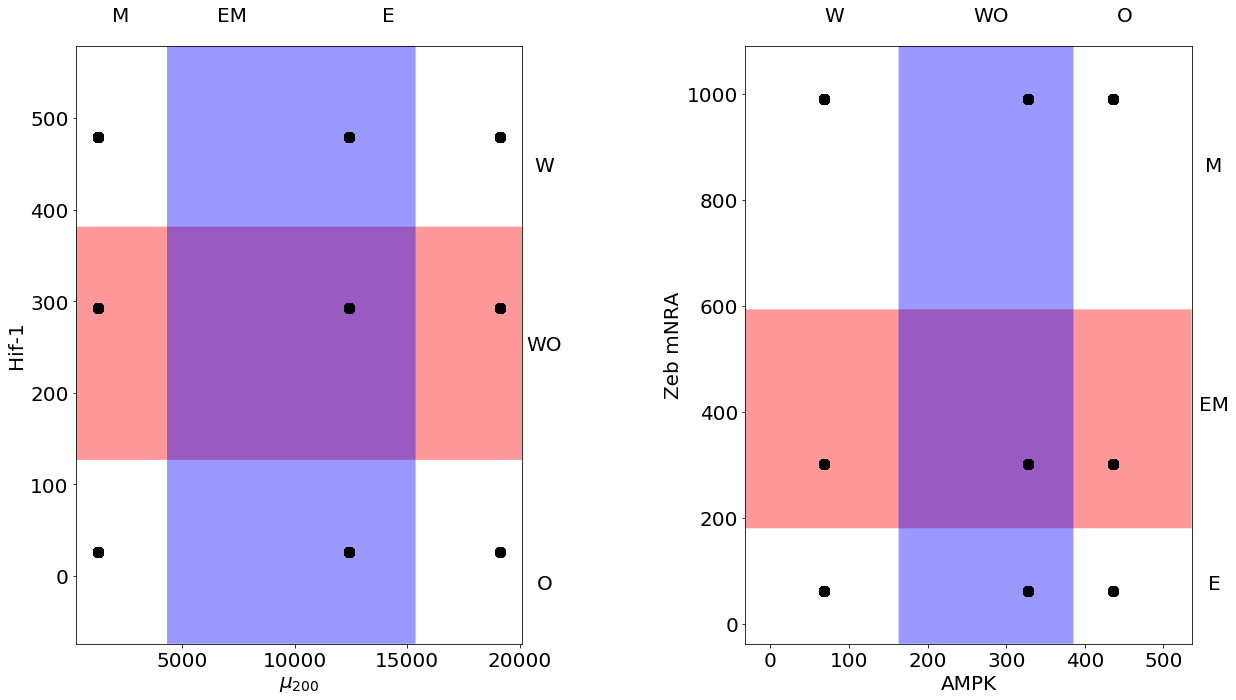

EMT_MR_comp_4_1000_.png
EMT_MR_comp_1_500_res.txt


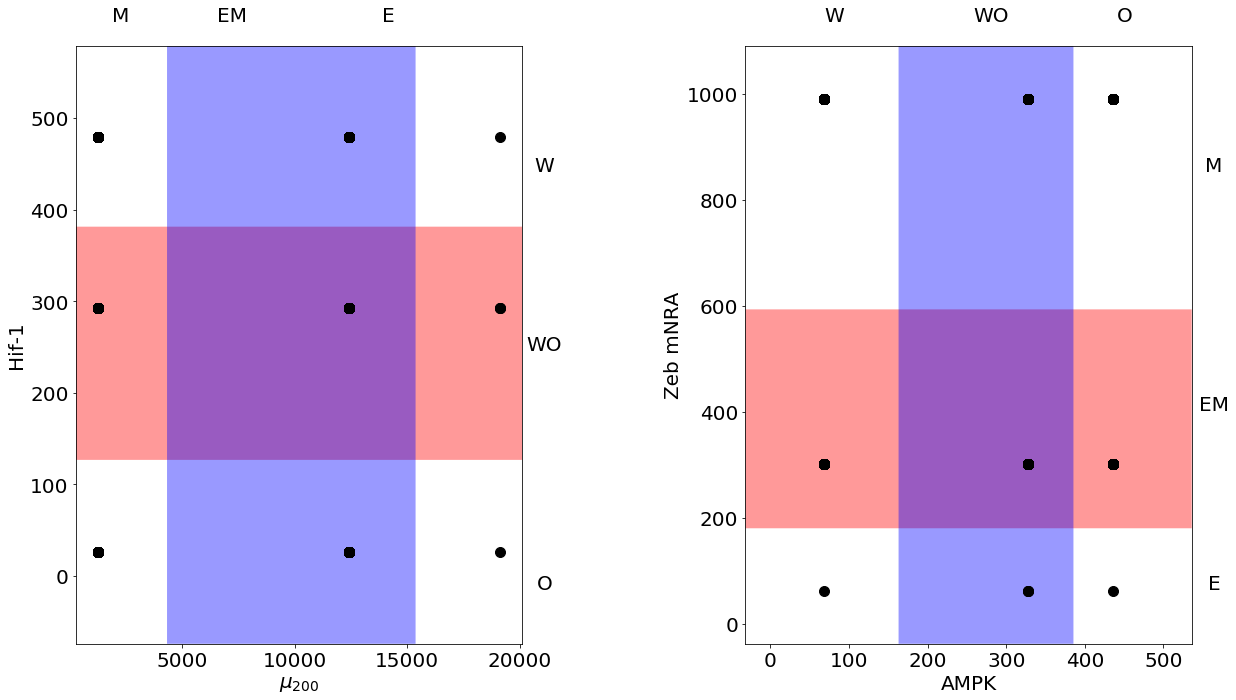

EMT_MR_comp_3_10000.png
EMT_MR_comp_3_10000_res.txt


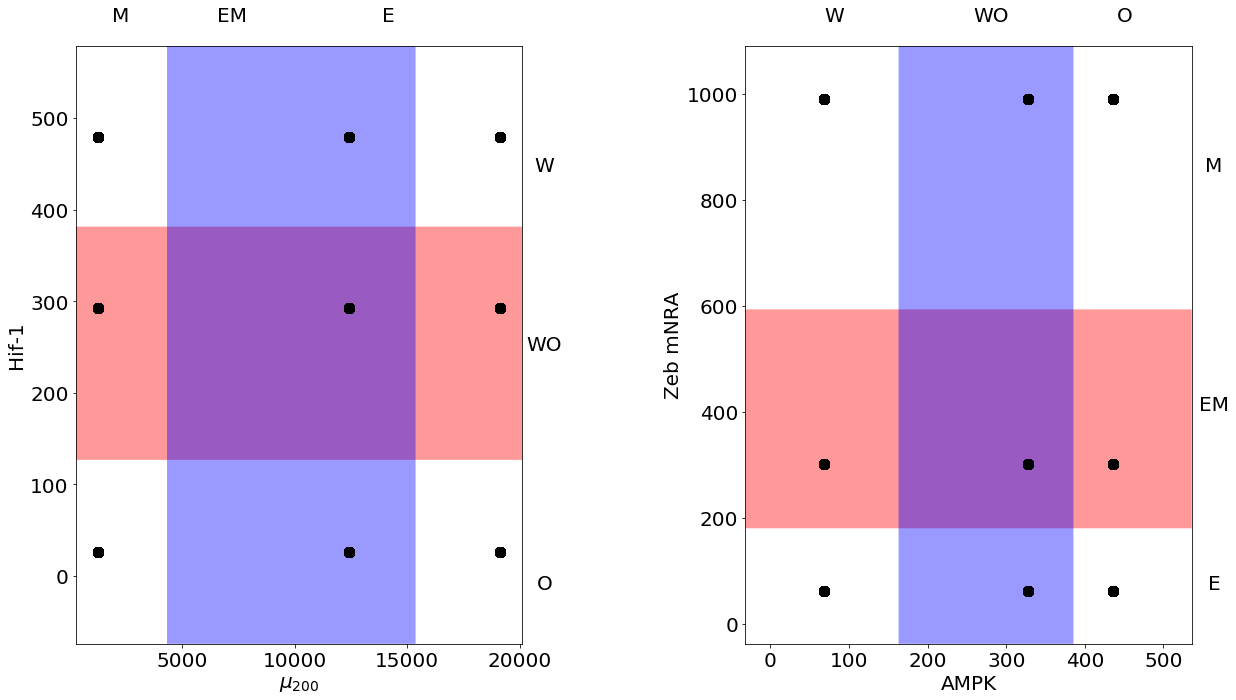

EMT_MR_comp_2_100_res.txt


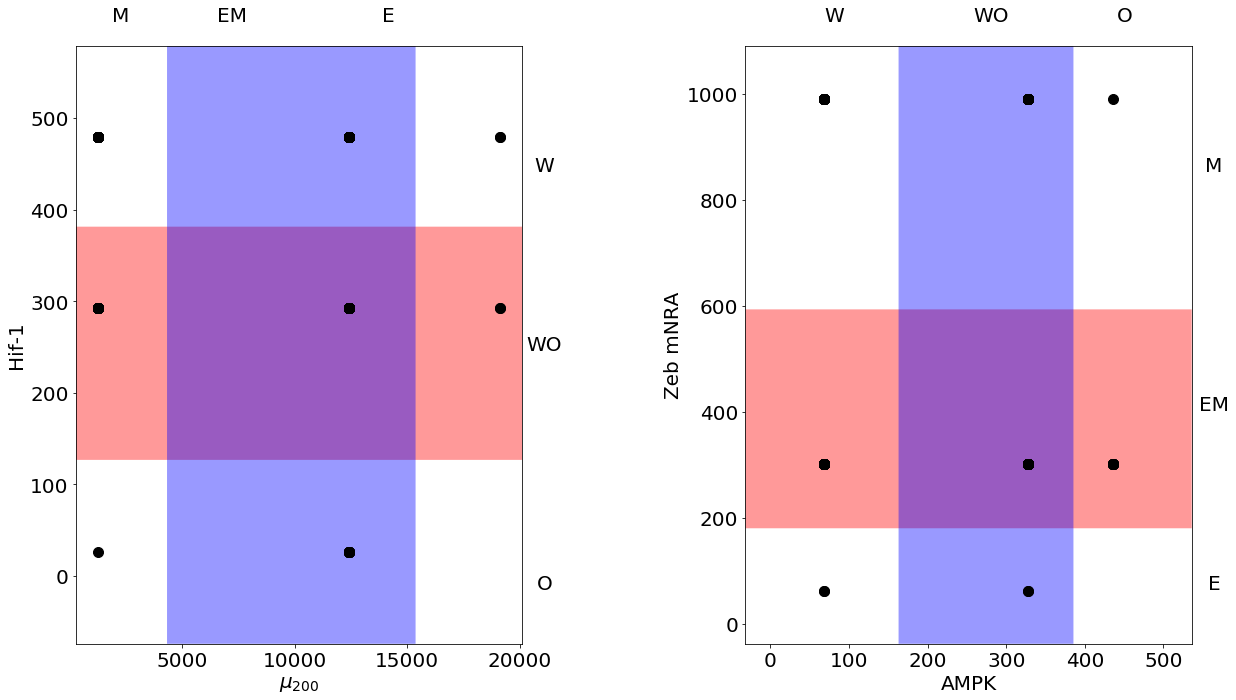

EMT_MR_comp_7_1000_ics.txt
EMT_MR_comp_4_2000_ics.txt
EMT_MR_comp_10_10000_ics.txt
EMT_MR_comp_8_2000_res.txt


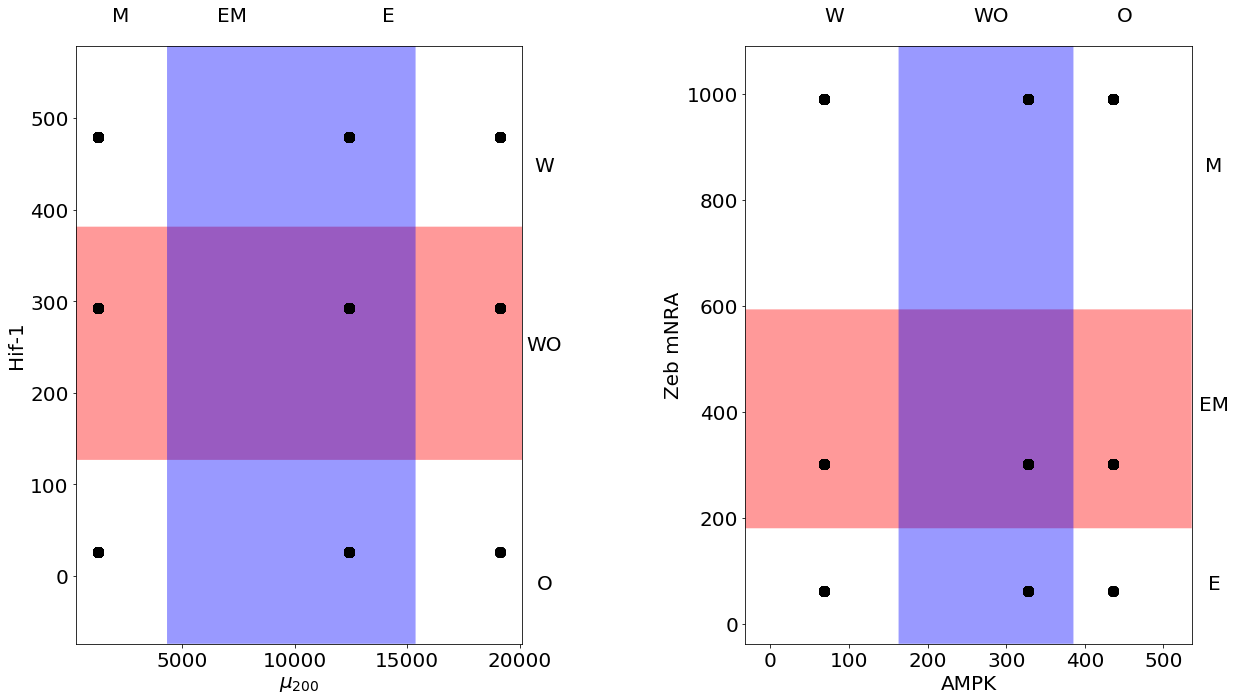

EMT_MR_comp_9_2000_ics.txt
EMT_MR_comp_0_10000_res.txt


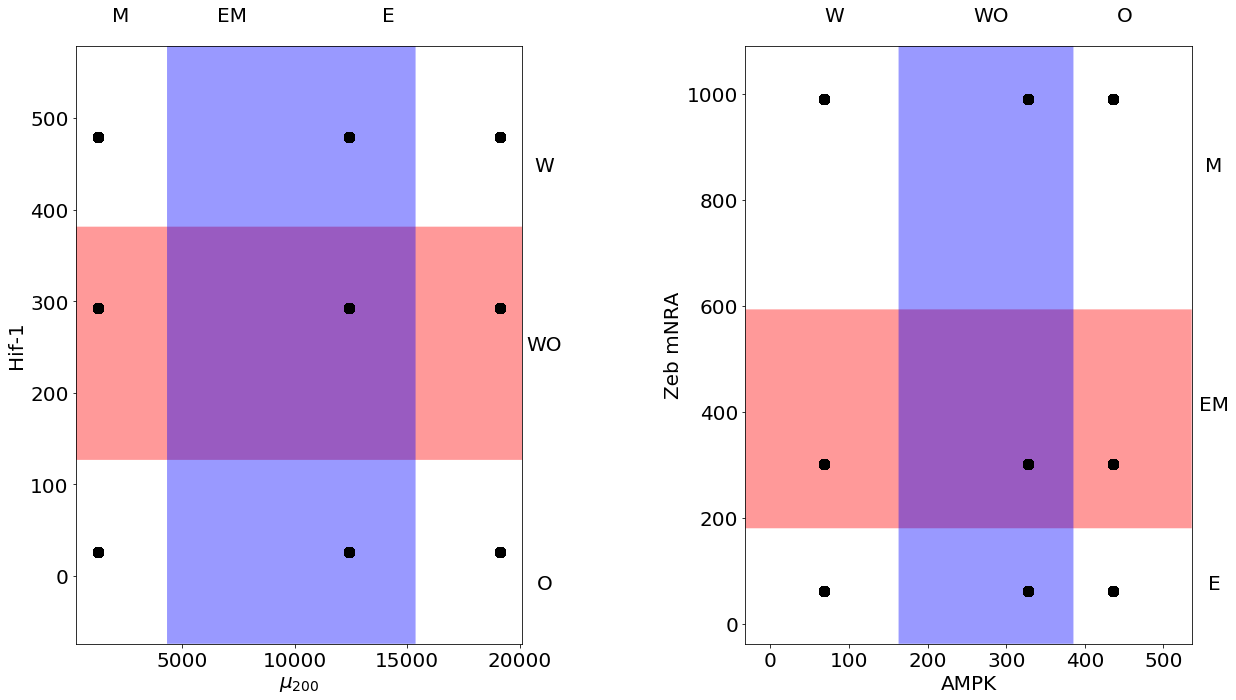

EMT_MR_comp_8_1000_.png
EMT_MR_comp_9_10000_ics.txt
EMT_MR_comp_1_100_ics.txt
EMT_MR_comp_1_2000_res.txt


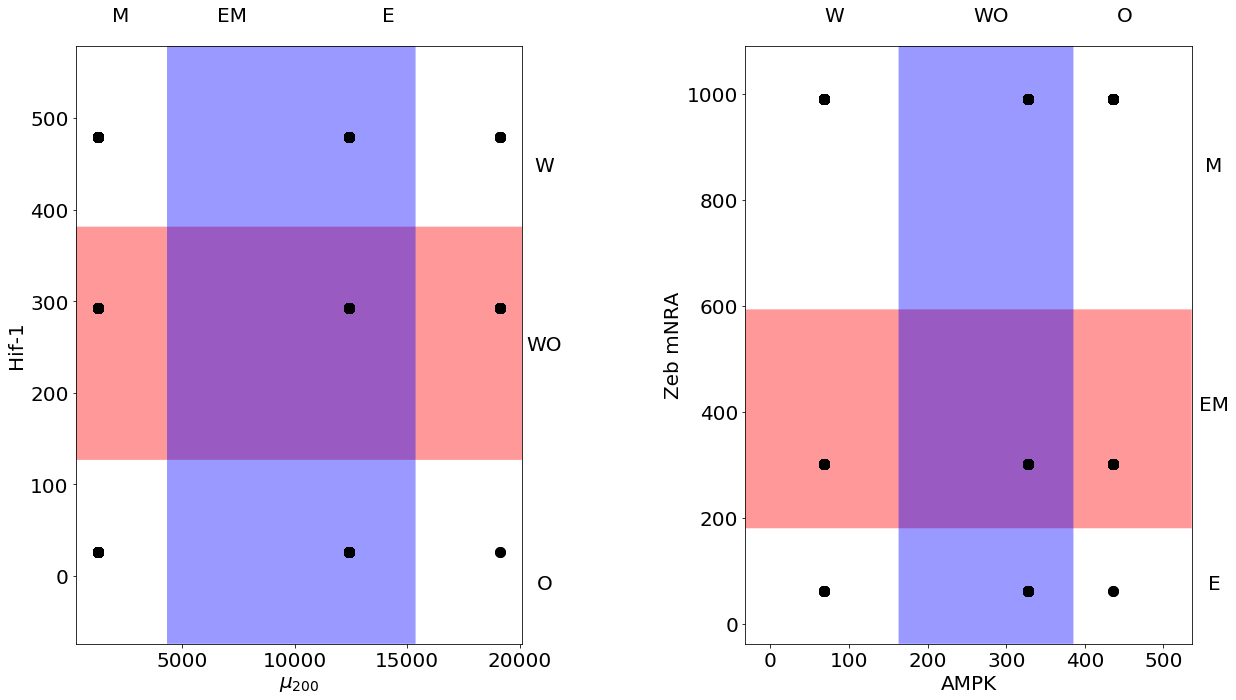

EMT_MR_comp_10_500_ics.txt
res_emtMR
EMT_MR_comp_0_1000_ics.txt
EMT_MR_comp_2_2000_.png
EMT_MR_comp_8_5000_.png
EMT_MR_comp_8_10000.png
EMT_MR_comp_3_1000_res.txt


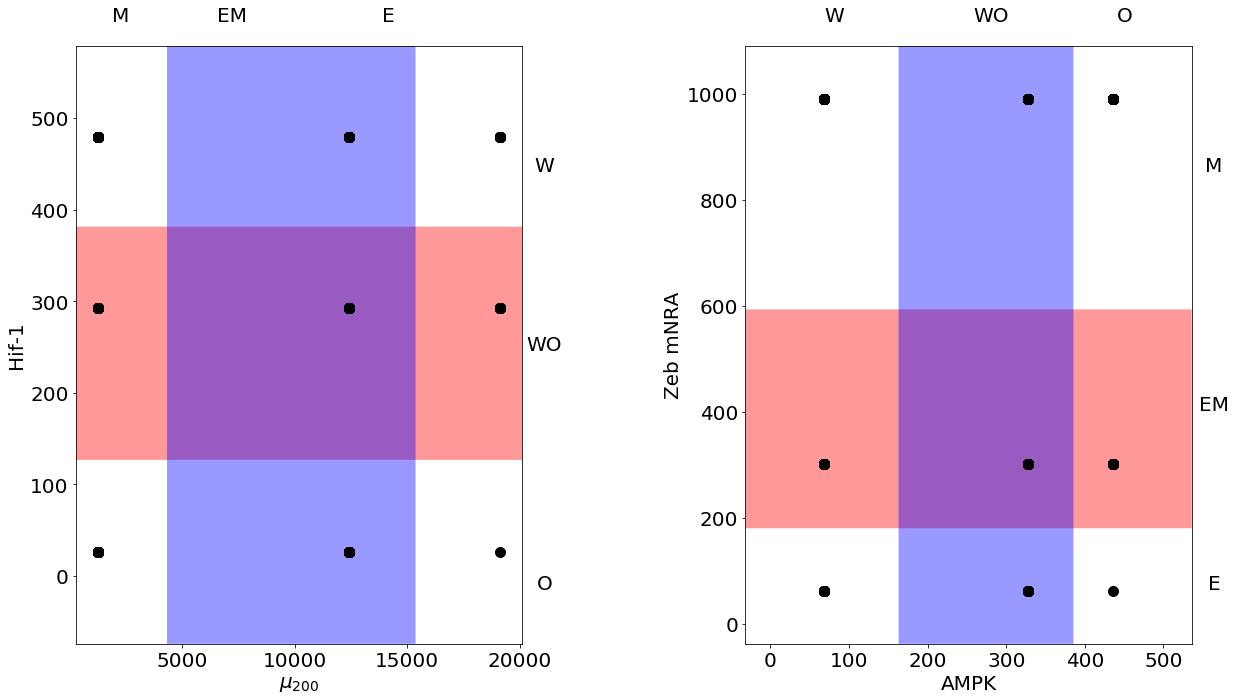

EMT_MR_comp_9_10000.png
EMT_MR_comp_9_100_ics.txt
EMT_MR_comp_5_1000_ics.txt
EMT_MR_comp_1_1000_.png
EMT_MR_comp_4_10000_.png
EMT_MR_comp_8_10000_.png
EMT_MR_comp_10_5000_.png
EMT_MR_comp_7_10000.png
EMT_MR_comp_7_100_res.txt


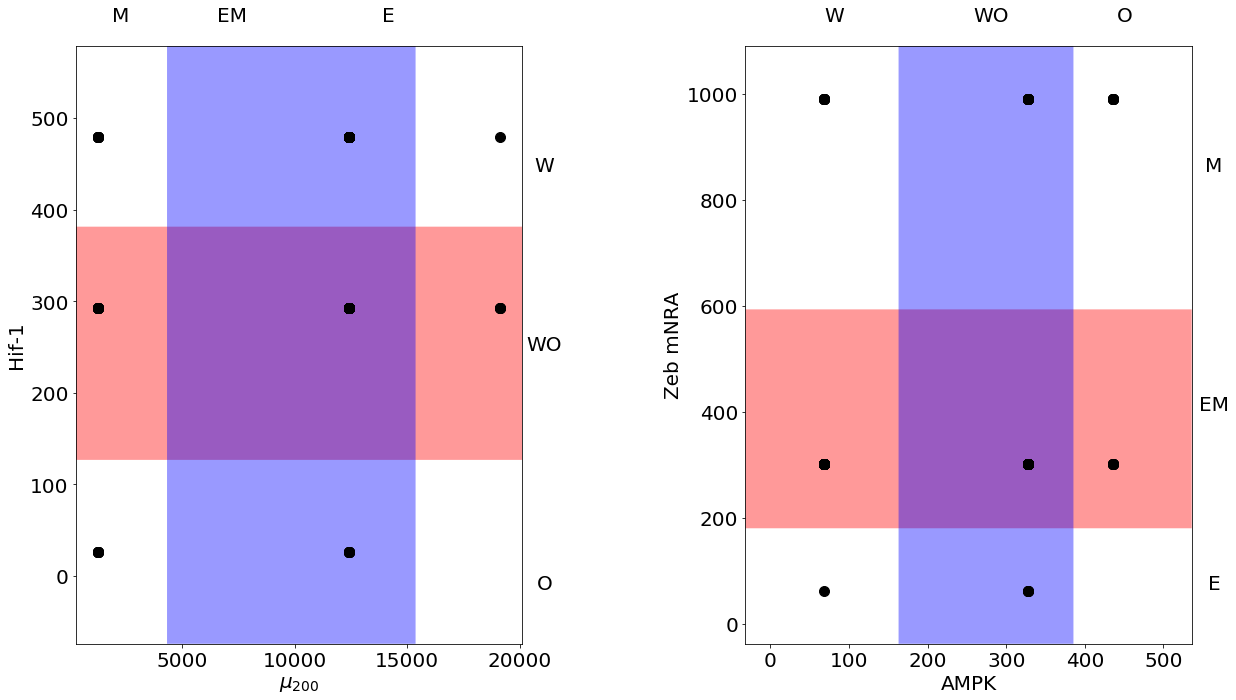

EMT_MR_comp_5_1000_res.txt


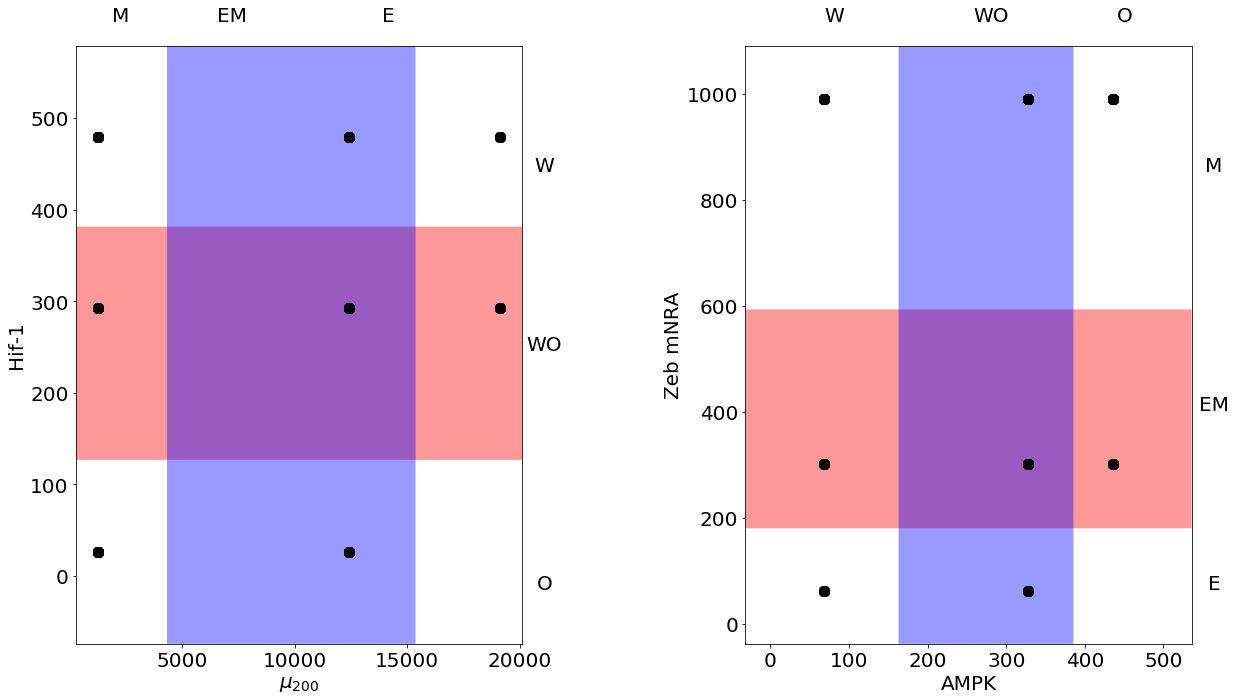

EMT_MR_comp_7_2000_.png
EMT_MR_comp_2_2000.png
EMT_MR_comp_1_5000_ics.txt
EMT_MR_comp_8_100_res.txt


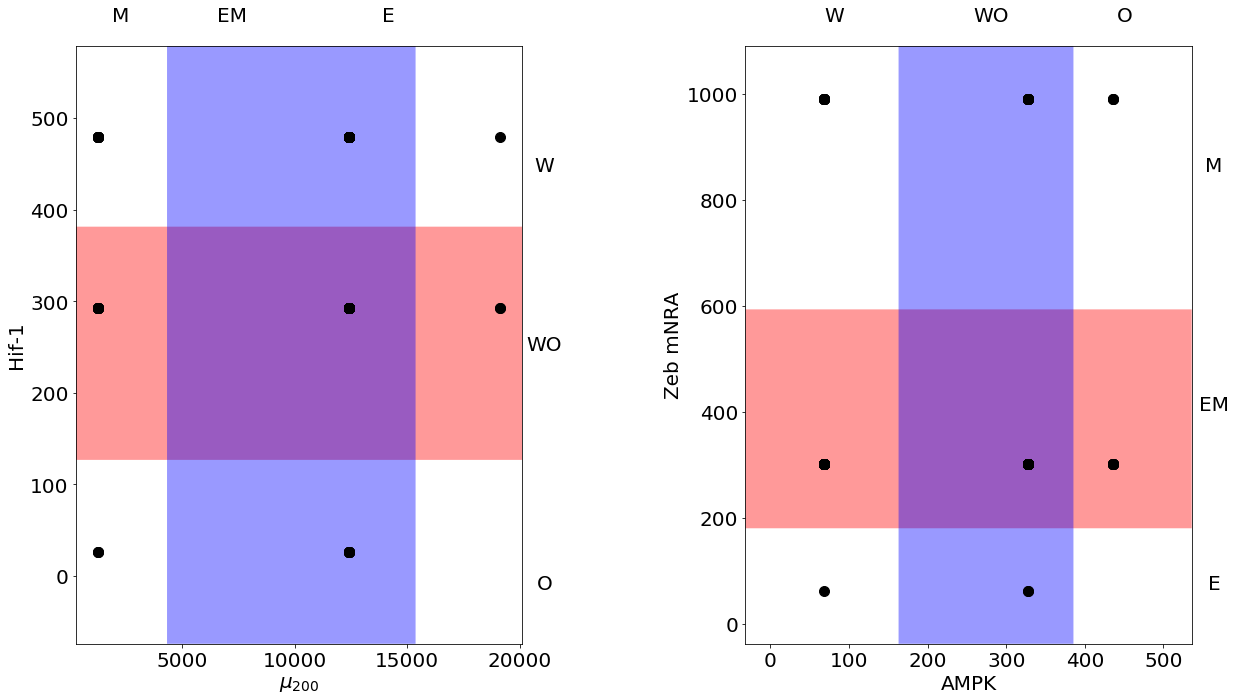

EMT_MR_comp_7_5000_res.txt


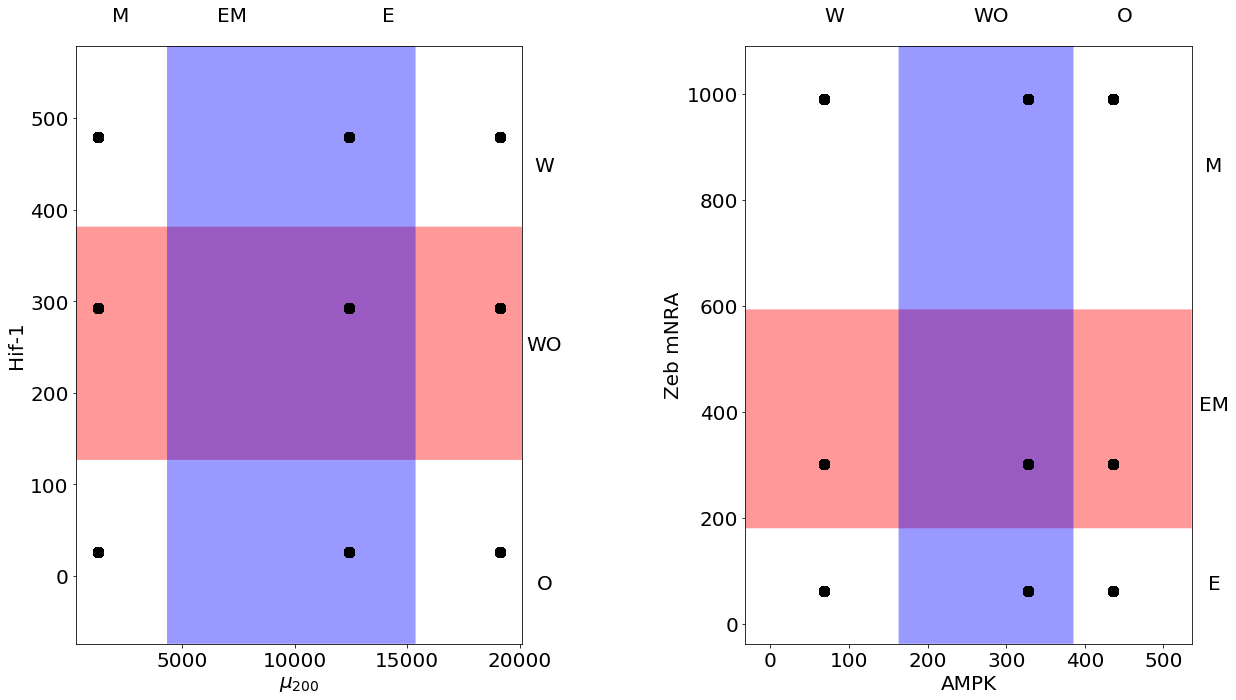

EMT_MR_comp_6_10000_res.txt


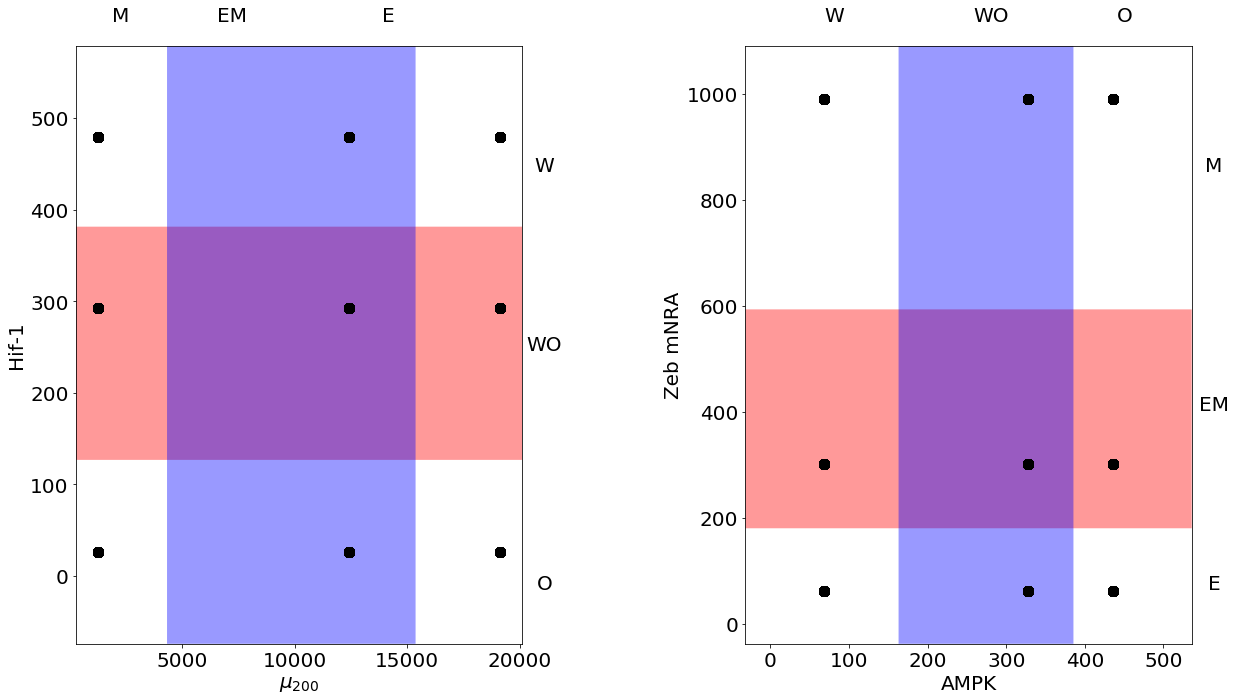

EMT_MR_comp_8_2000.png
EMT_MR_comp_10_5000_res.txt


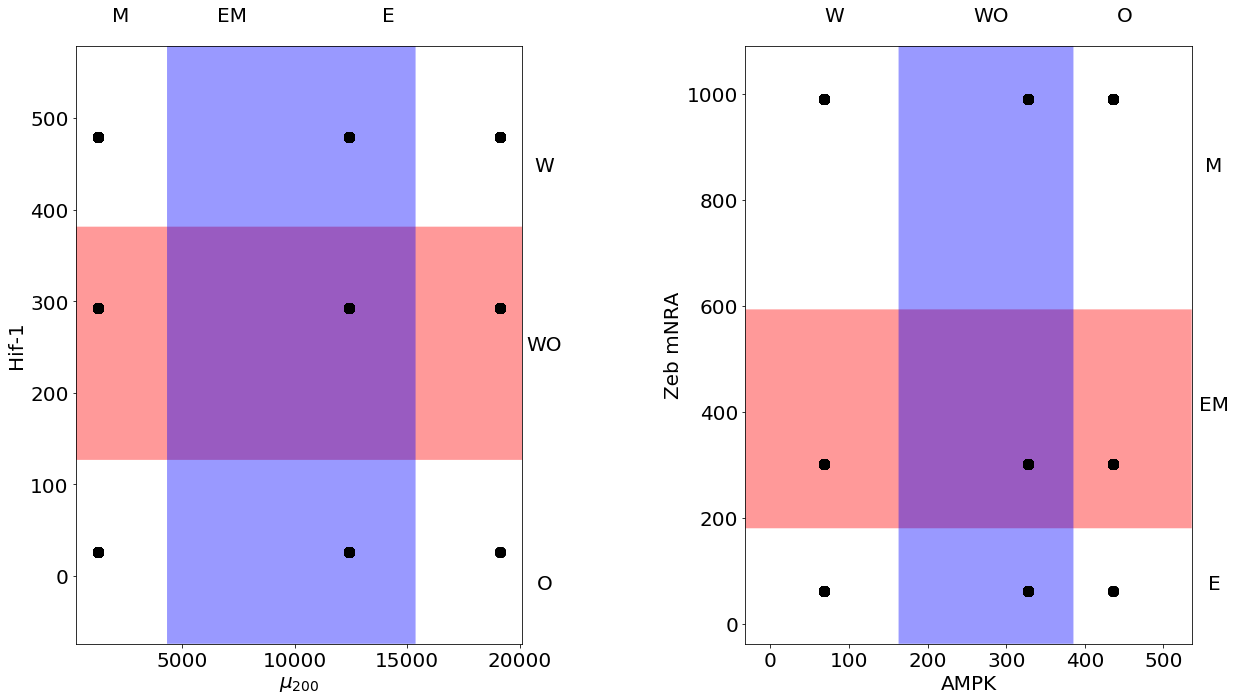

EMT_MR_comp_6_1000_.png
EMT_MR_comp_0_5000.png
EMT_MR_comp_3_100_ics.txt
EMT_MR_comp_8_1000_ics.txt
EMT_MR_comp_7_5000_.png
EMT_MR_comp_1_1000_ics.txt
EMT_MR_comp_2_10000.png
EMT_MR_comp_10_2000_.png
EMT_MR_comp_4_500_res.txt


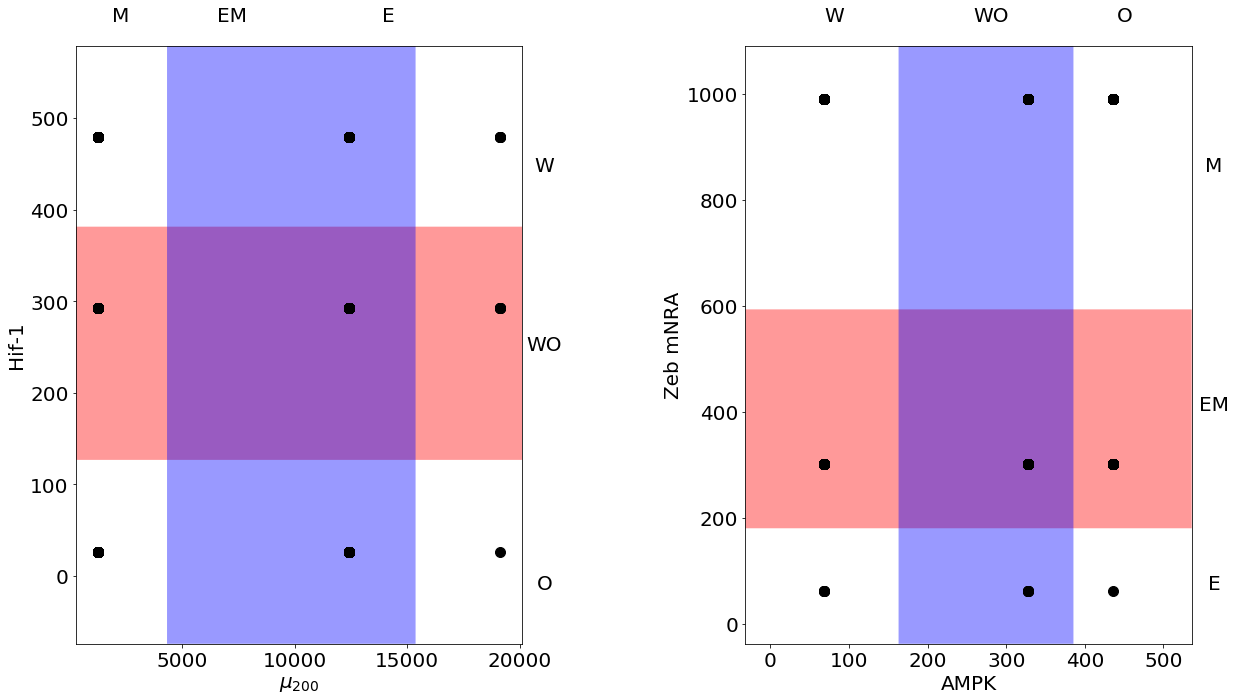

EMT_MR_comp_9_2000_res.txt


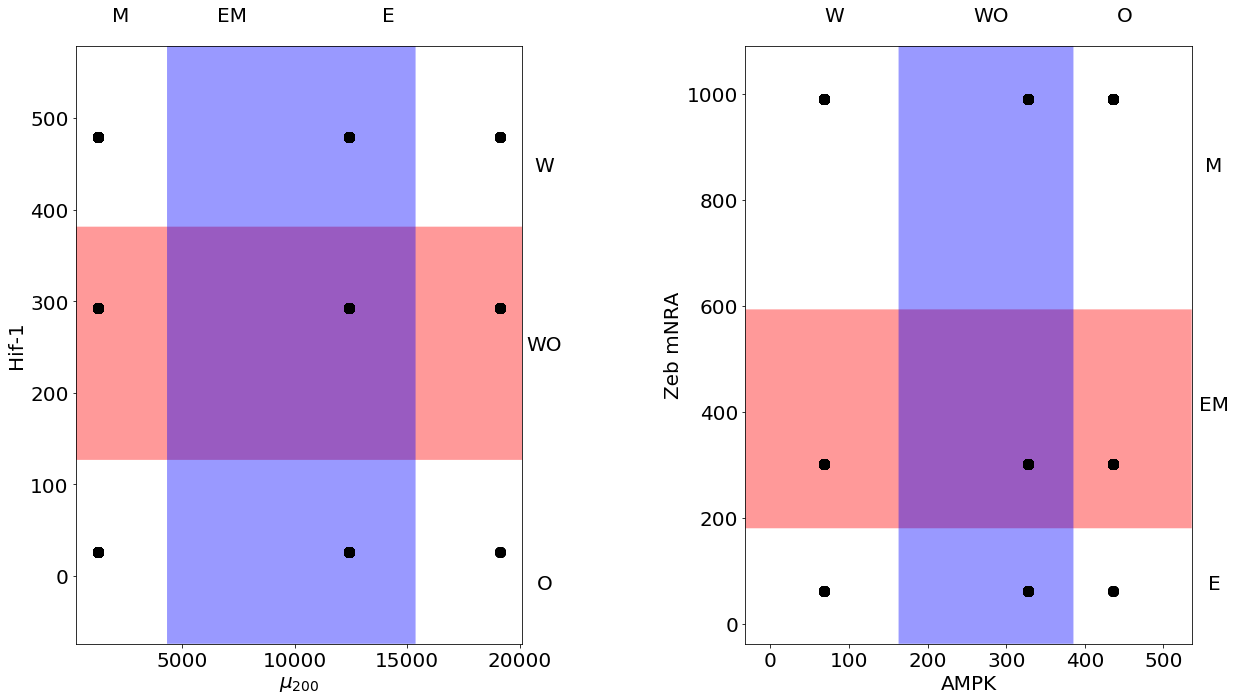

EMT_MR_comp_9_10000_res.txt


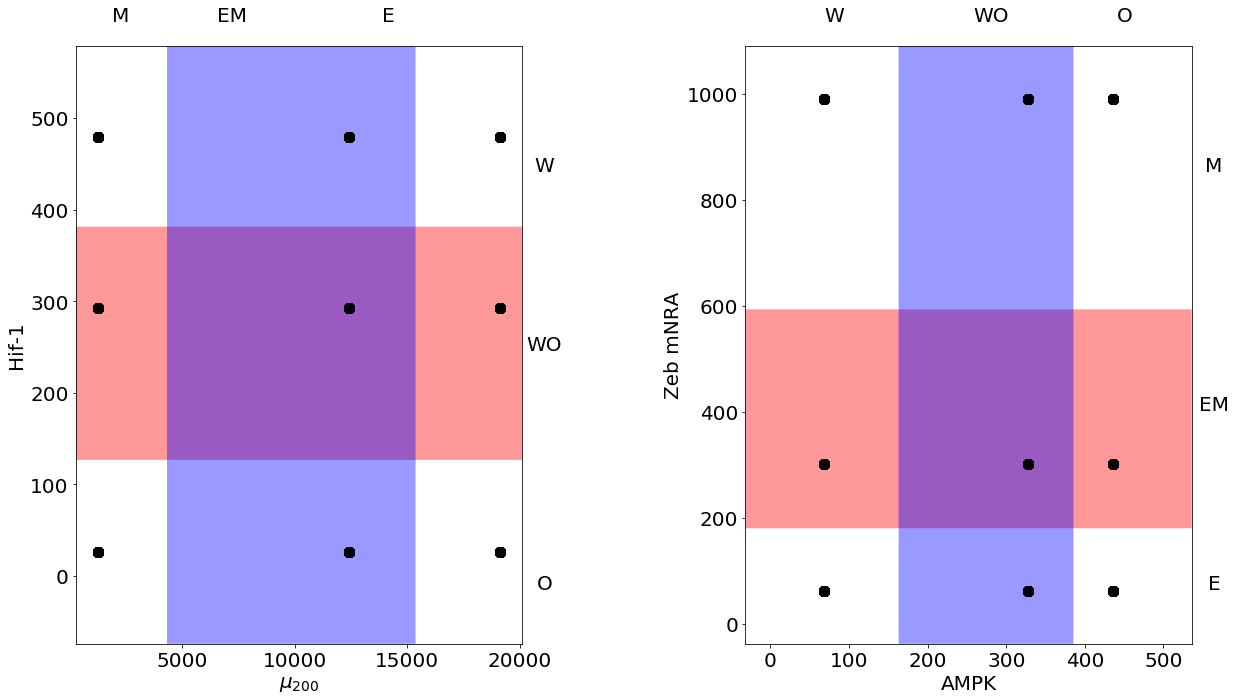

EMT_MR_comp_2_2000_ics.txt
EMT_MR_comp_6_2000.png
EMT_MR_comp_4_100_res.txt


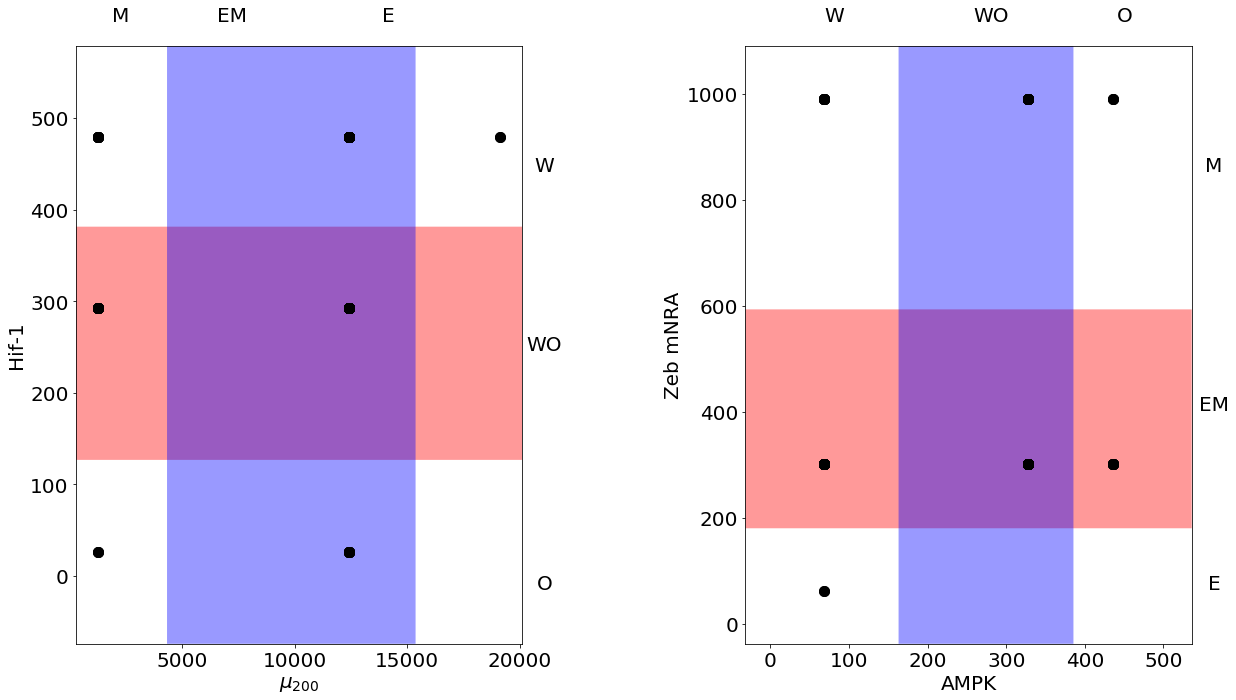

EMT_MR_comp_5_10000_.png
EMT_MR_comp_8_500_res.txt


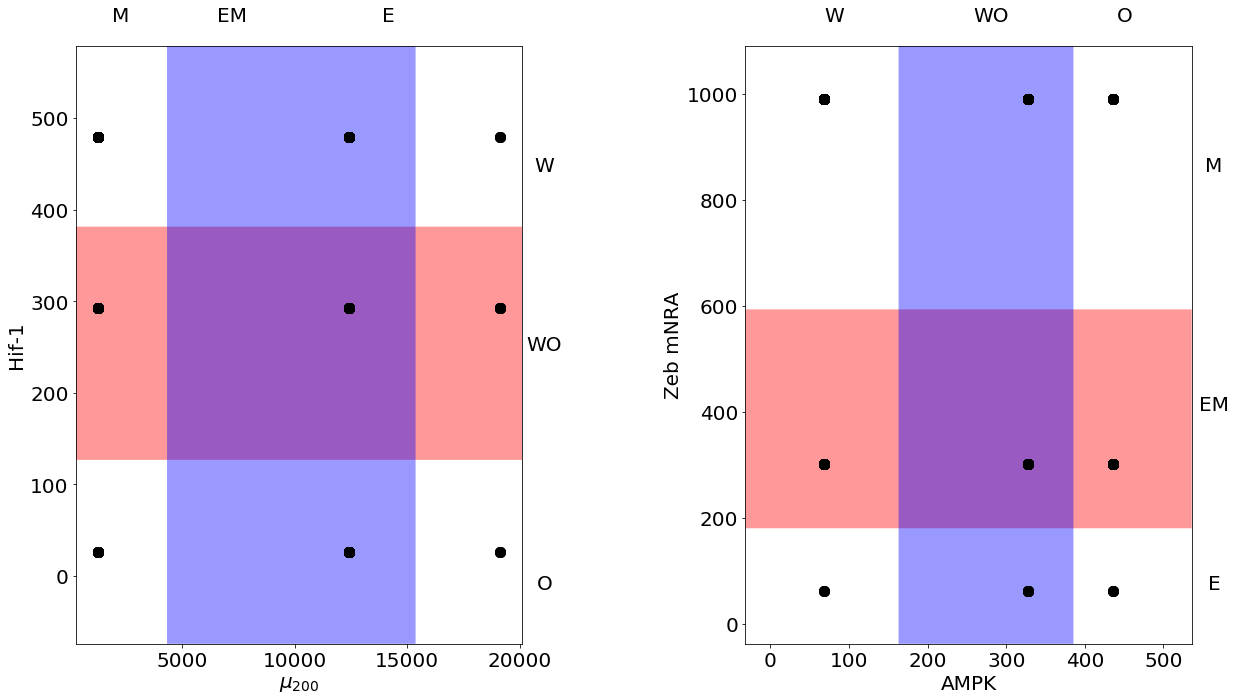

EMT_MR_comp_1_10000_res.txt


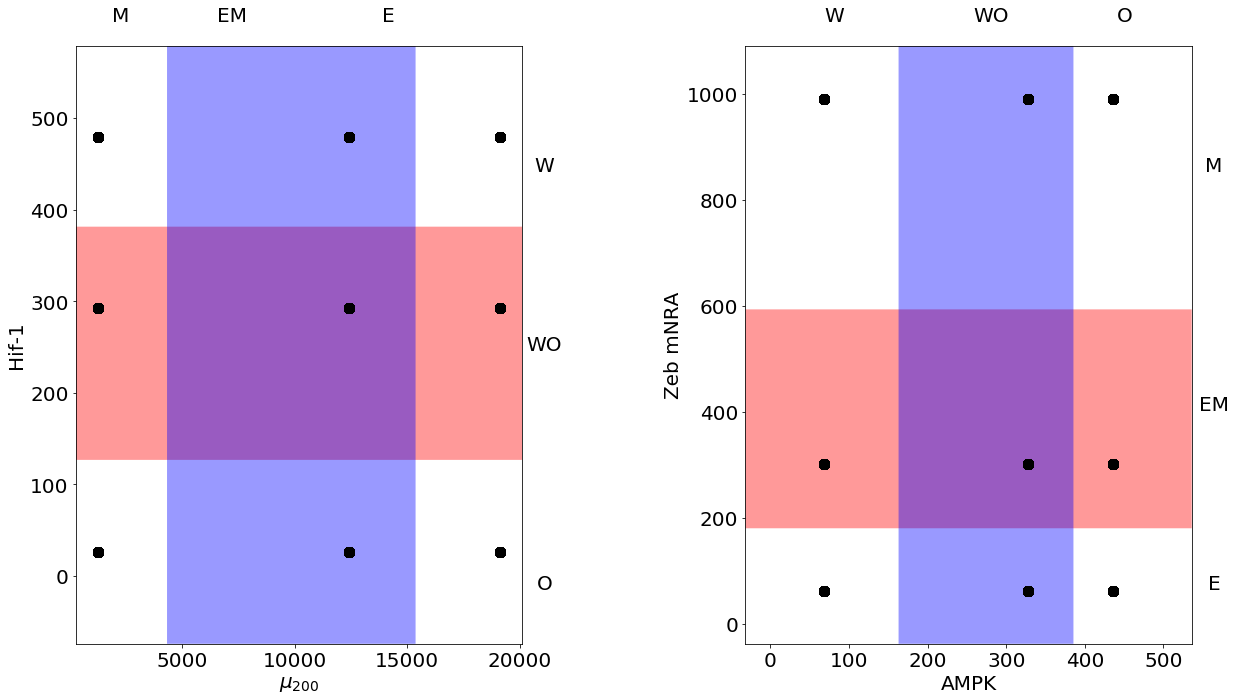

EMT_MR_comp_5_5000_.png
EMT_MR_comp_7_2000.png
EMT_MR_comp_1_500_ics.txt
EMT_MR_comp_6_100_ics.txt
EMT_MR_comp_7_10000_ics.txt
EMT_MR_comp_3_1000_ics.txt
EMT_MR_comp_8_5000_ics.txt
EMT_MR_comp_0_10000_.png
EMT_MR_comp_5_5000_res.txt


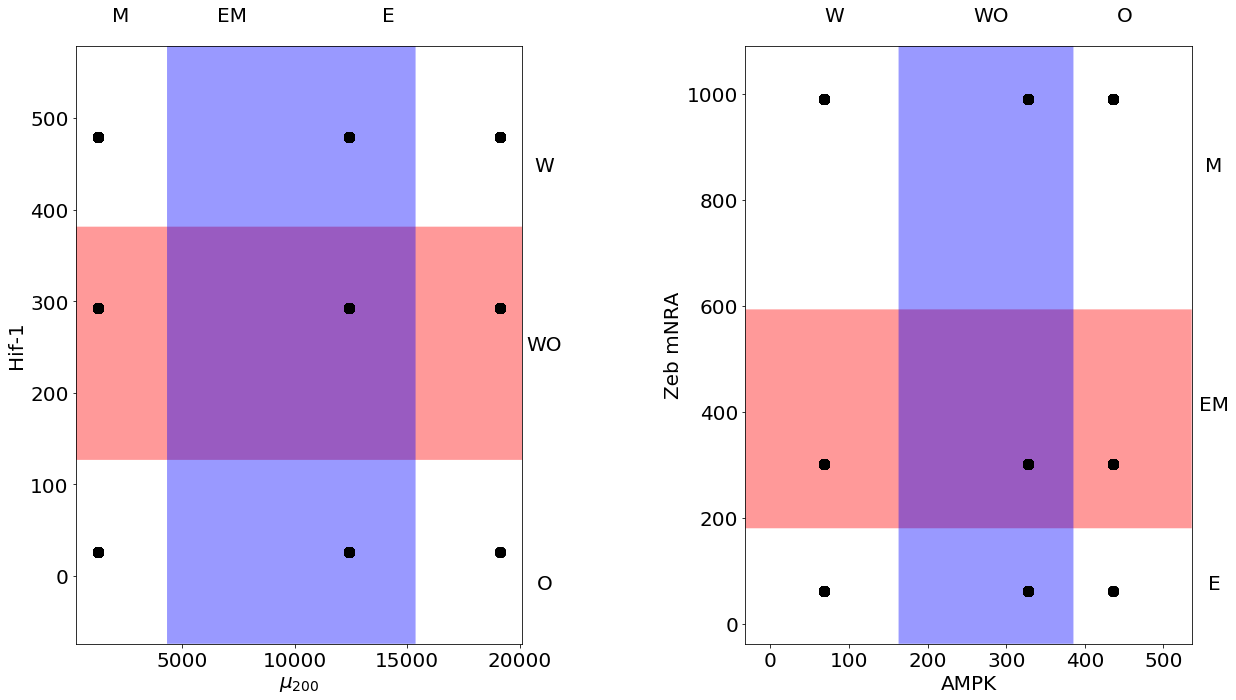

EMT_MR_comp_0_500_res.txt


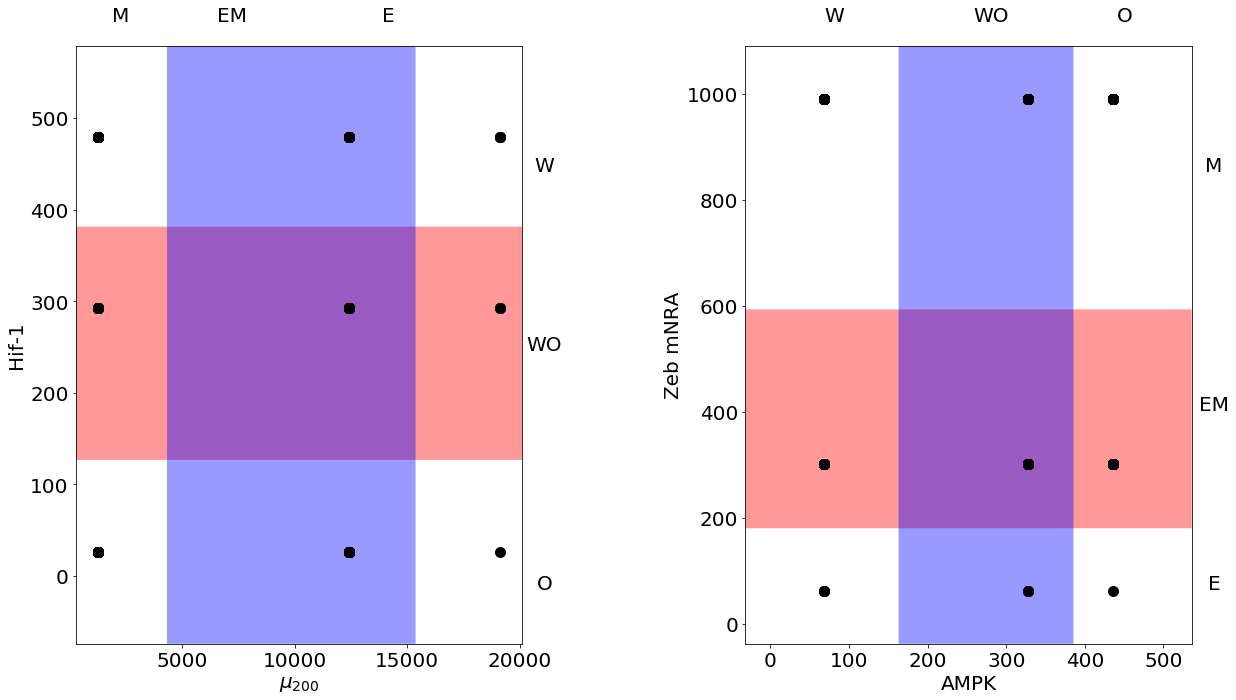

EMT_MR_comp_3_2000.png
EMT_MR_comp_0_1000_res.txt


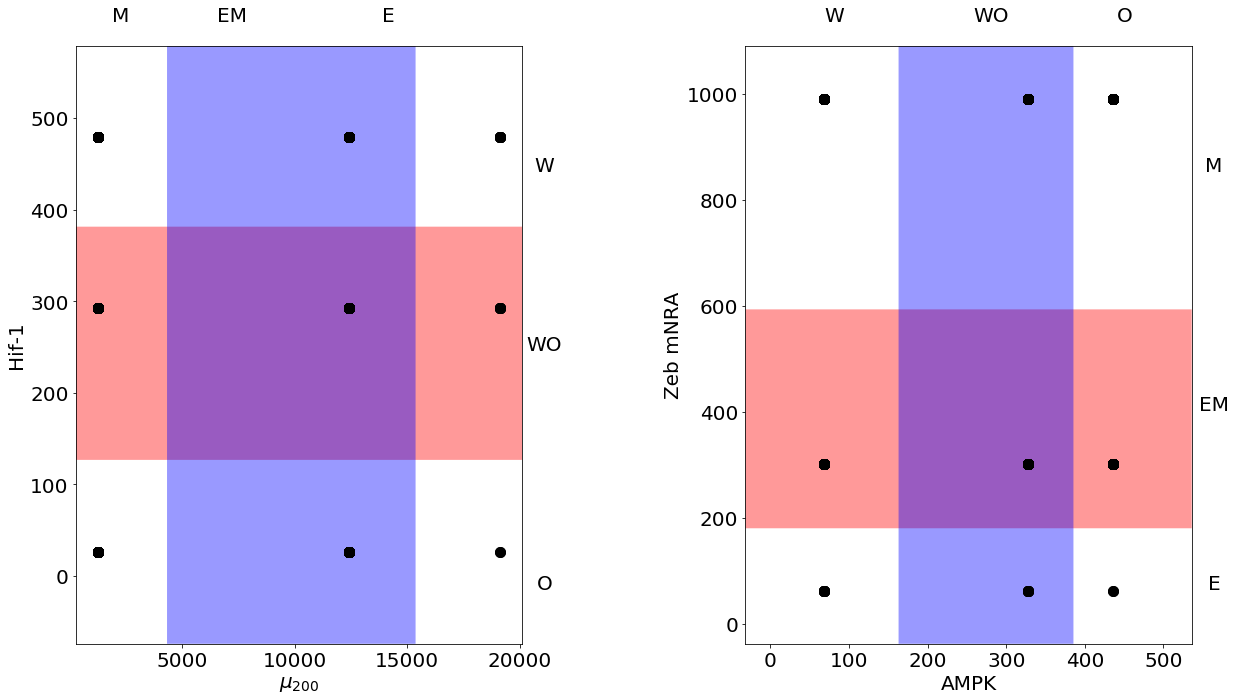

EMT_MR_comp_6_1000_ics.txt
EMT_MR_comp_3_2000_ics.txt
EMT_MR_comp_2_5000_.png
EMT_MR_comp_3_2000_res.txt


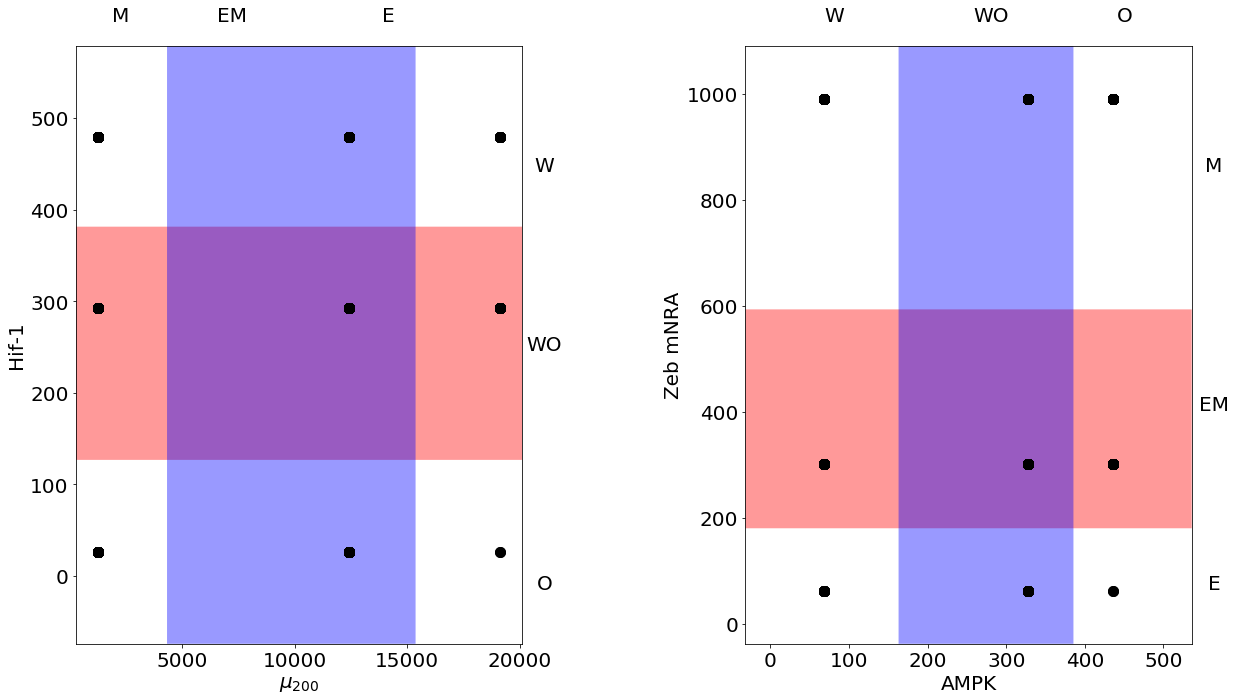

EMT_MR_comp_6_2000_.png
EMT_MR_comp_3_10000_ics.txt
EMT_MR_comp_1_10000.png
EMT_MR_comp_5_2000_.png
EMT_MR_comp_1_1000_res.txt


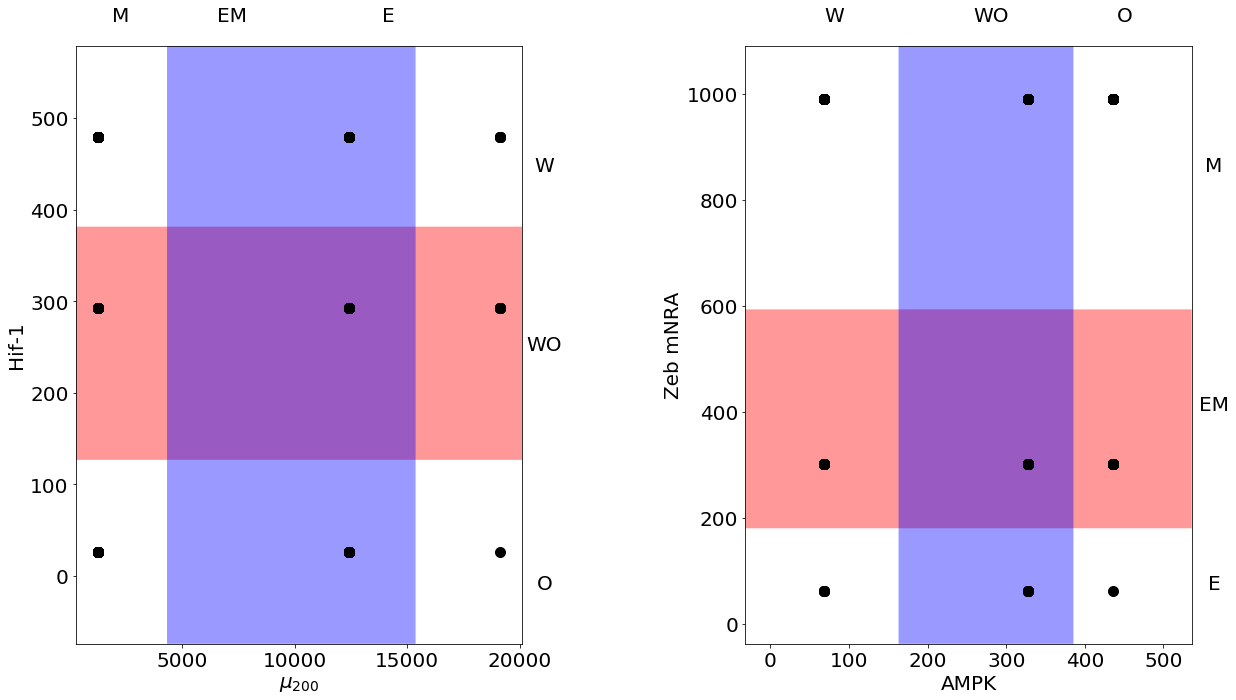

EMT_MR_comp_5_500_ics.txt
EMT_MR_comp_1_100_res.txt


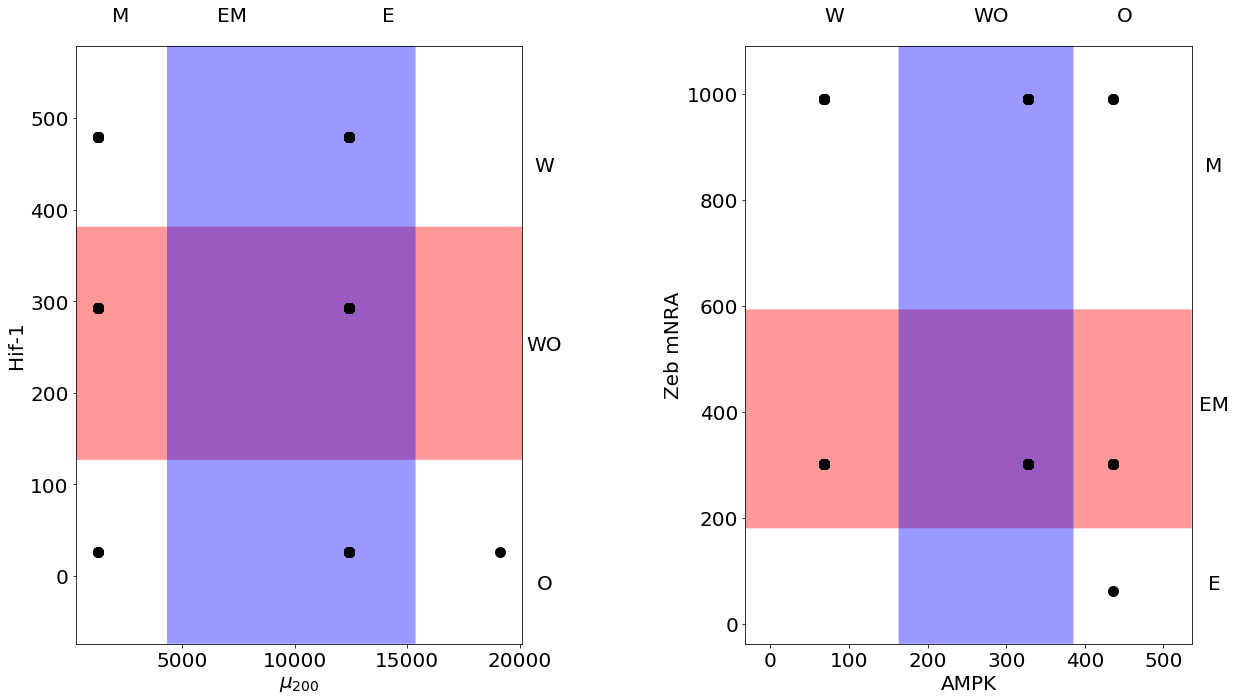

EMT_MR_comp_6_10000.png
EMT_MR_comp_9_1000_ics.txt
EMT_MR_comp_2_2000_res.txt


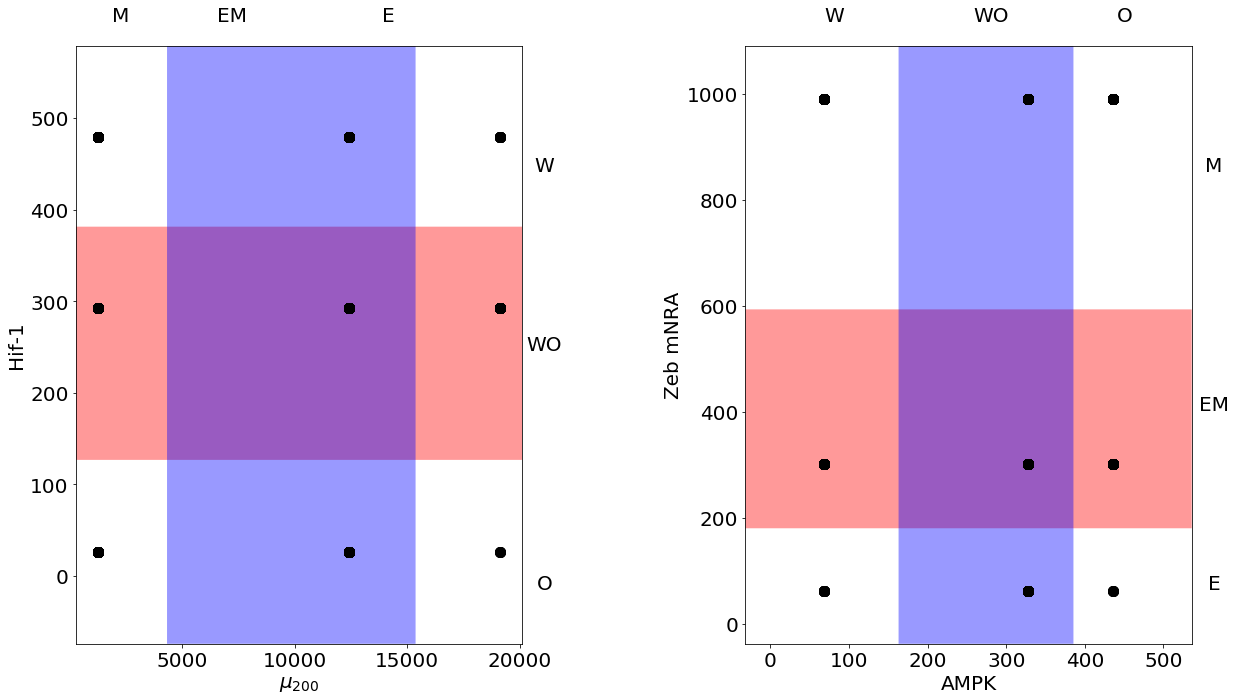

EMT_MR_comp_9_1000_res.txt


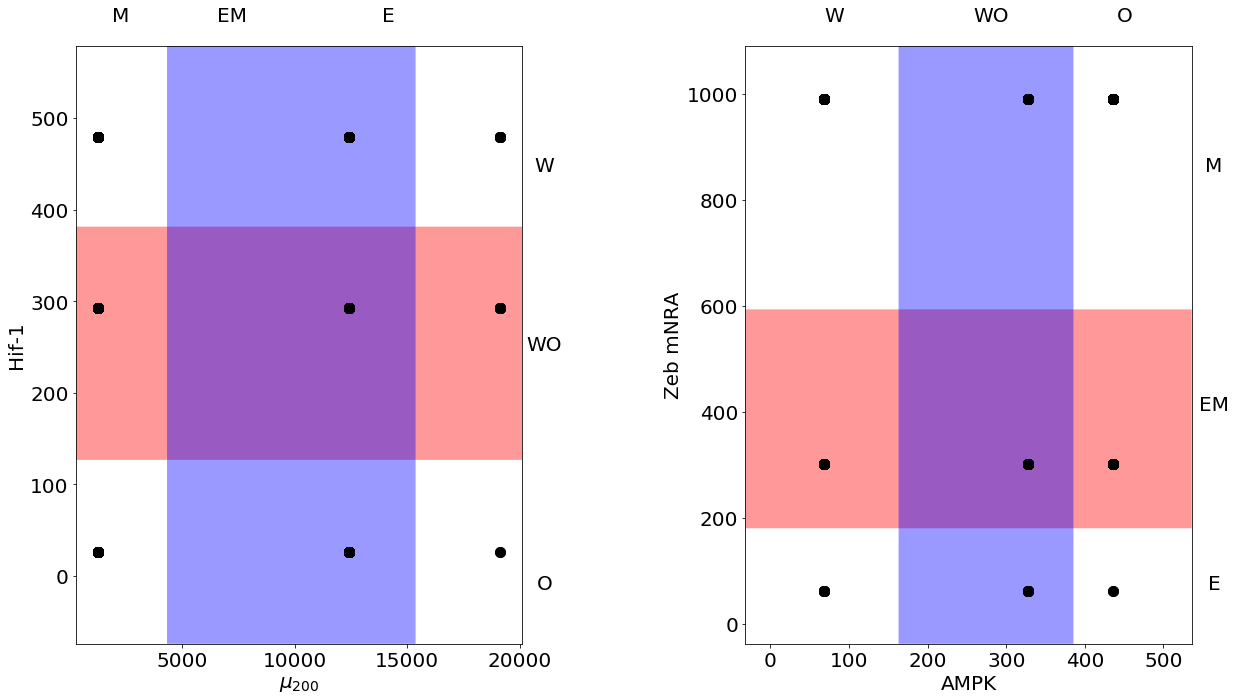

EMT_MR_comp_10_100_ics.txt
res_emt_mrH.cpp
EMT_MR_comp_10_10000_.png
EMT_MR_comp_4_2000_.png
EMT_MR_comp_5_1000_.png
EMT_MR_comp_3_5000_ics.txt
EMT_MR_comp_1_2000_.png
EMT_MR_comp_2_5000_ics.txt
EMT_MR_comp_8_2000_ics.txt
EMT_MR_comp_0_100_ics.txt
EMT_MR_comp_7_10000_res.txt


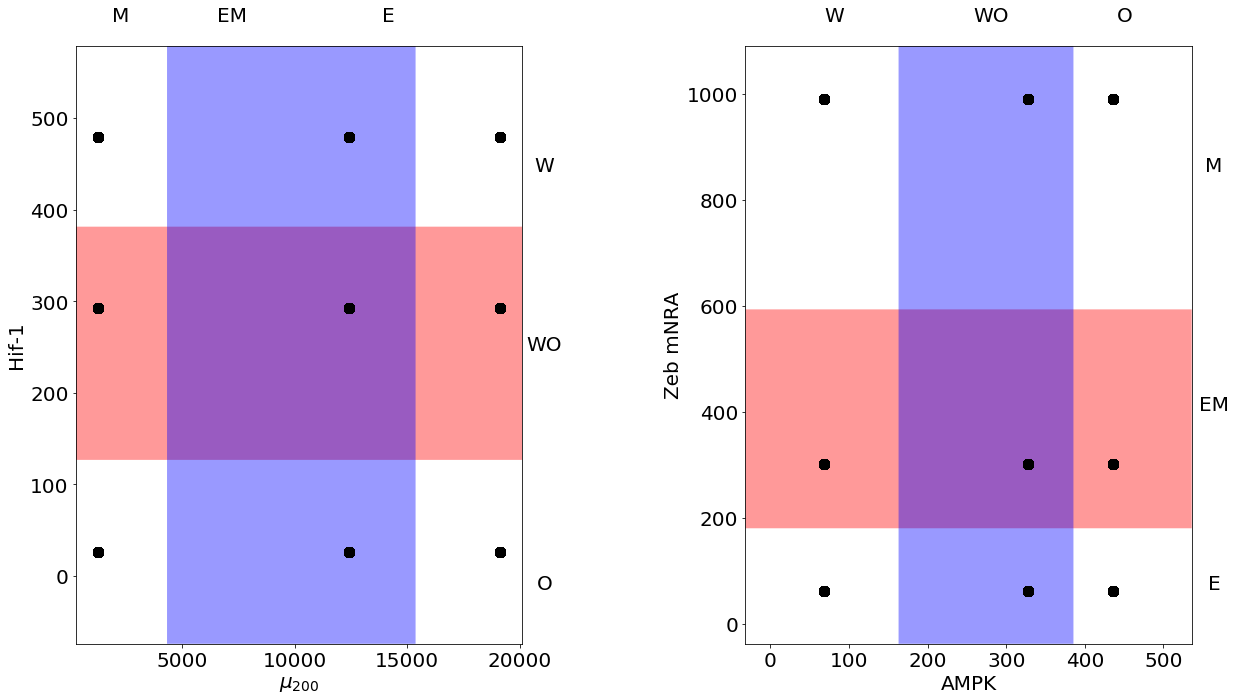

EMT_MR_comp_8_2000_.png
EMT_MR_comp_10_10000.png
EMT_MR_comp_5_5000.png
EMT_MR_comp_2_1000_ics.txt
EMT_MR_comp_3_1000_.png
EMT_MR_comp_8_10000_ics.txt
EMT_MR_comp_6_500_ics.txt
EMT_MR_comp_10_10000_res.txt


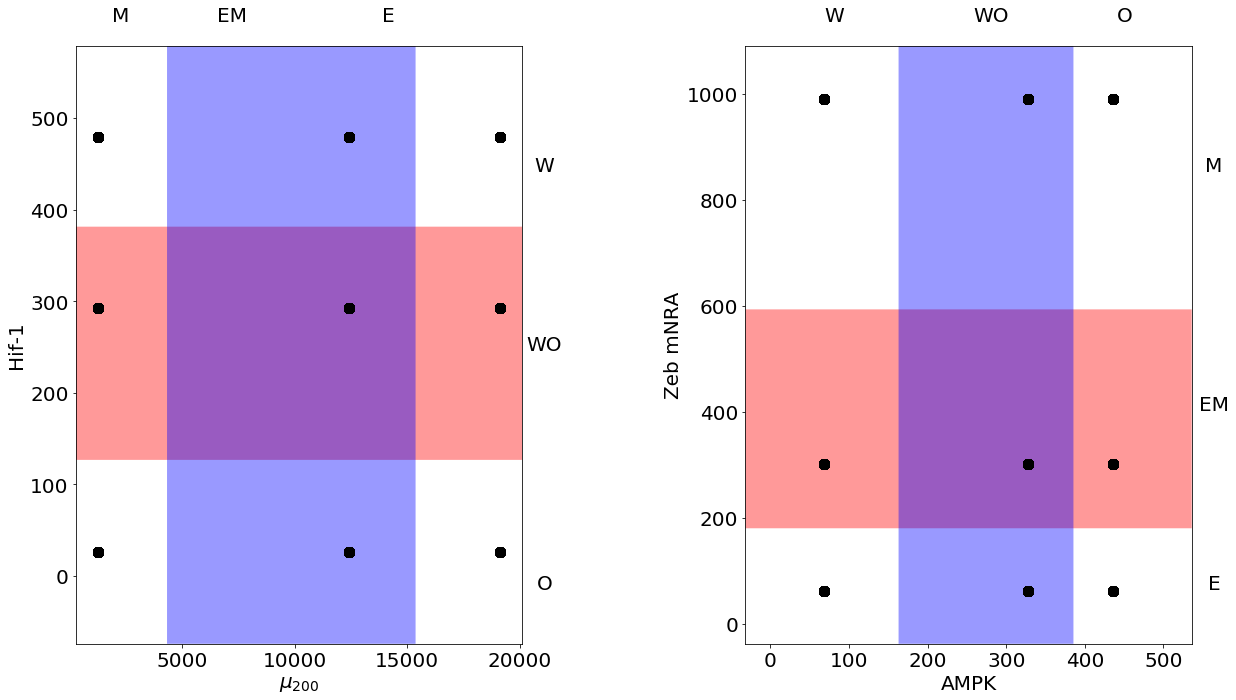

EMT_MR_comp_8_1000_res.txt


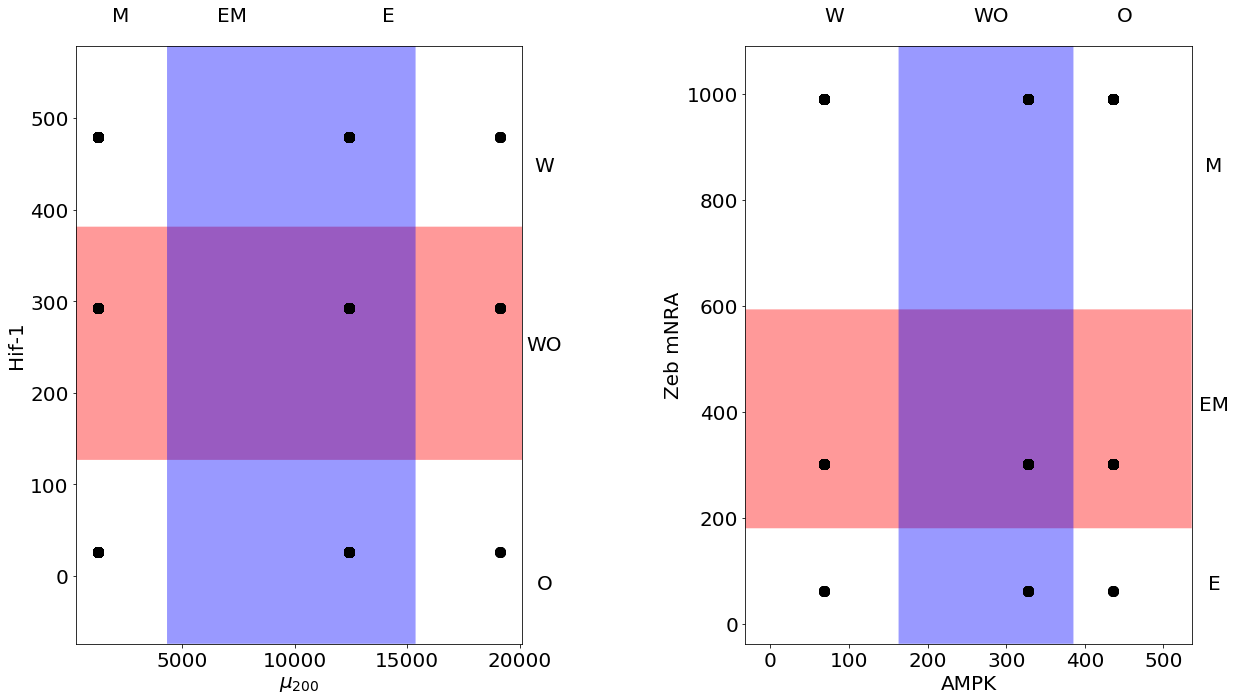

EMT_MR_comp_7_100_ics.txt
EMT_MR_comp_4_5000.png
EMT_MR_comp_1_5000_.png
EMT_MR_comp_6_2000_ics.txt
EMT_MR_comp_10_5000.png
EMT_MR_comp_0_10000.png
EMT_MR_comp_5_2000_ics.txt
EMT_MR_comp_6_1000_res.txt


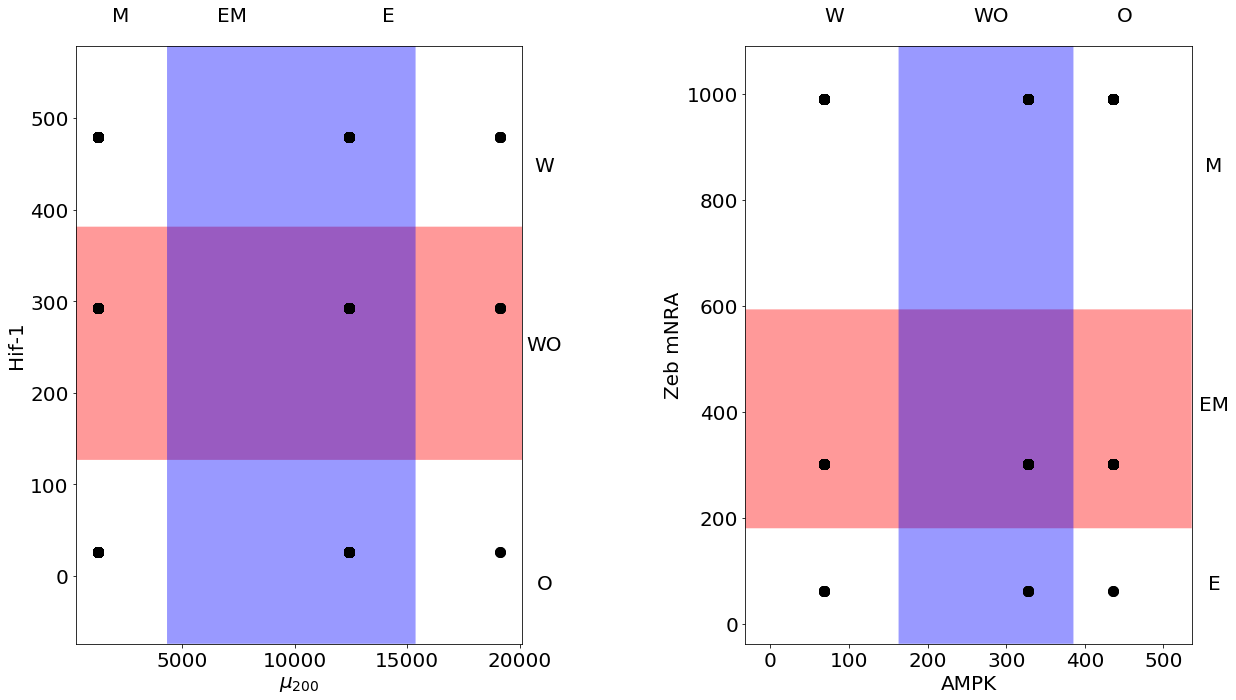

EMT_MR_comp_7_2000_res.txt


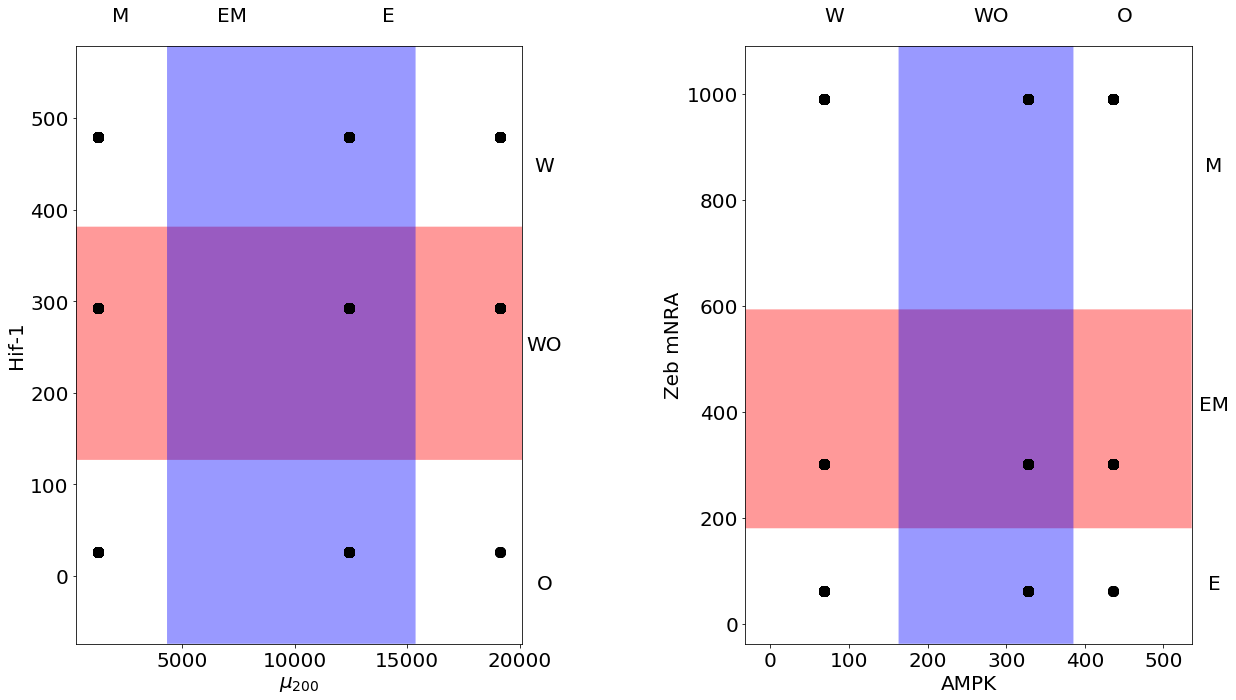

EMT_MR_comp_4_5000_ics.txt
EMT_MR_comp_0_1000_.png
EMT_MR_comp_2_5000_res.txt


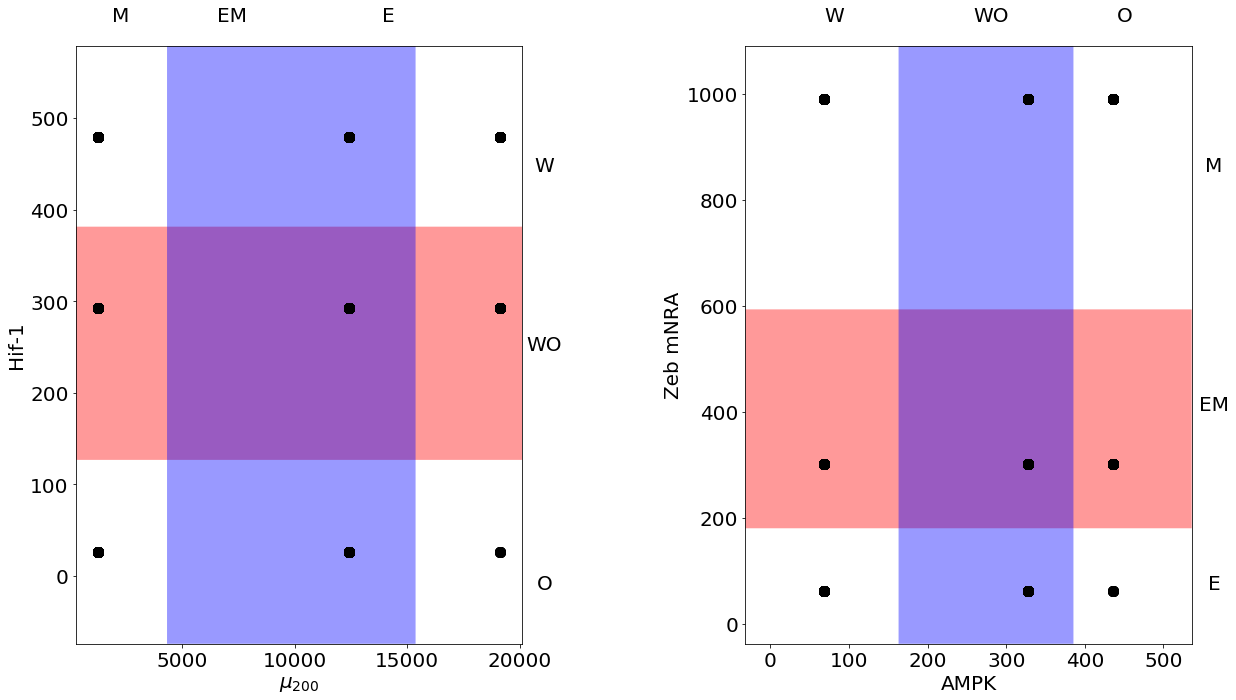

EMT_MR_comp_9_500_ics.txt
EMT_MR_comp_6_5000_res.txt


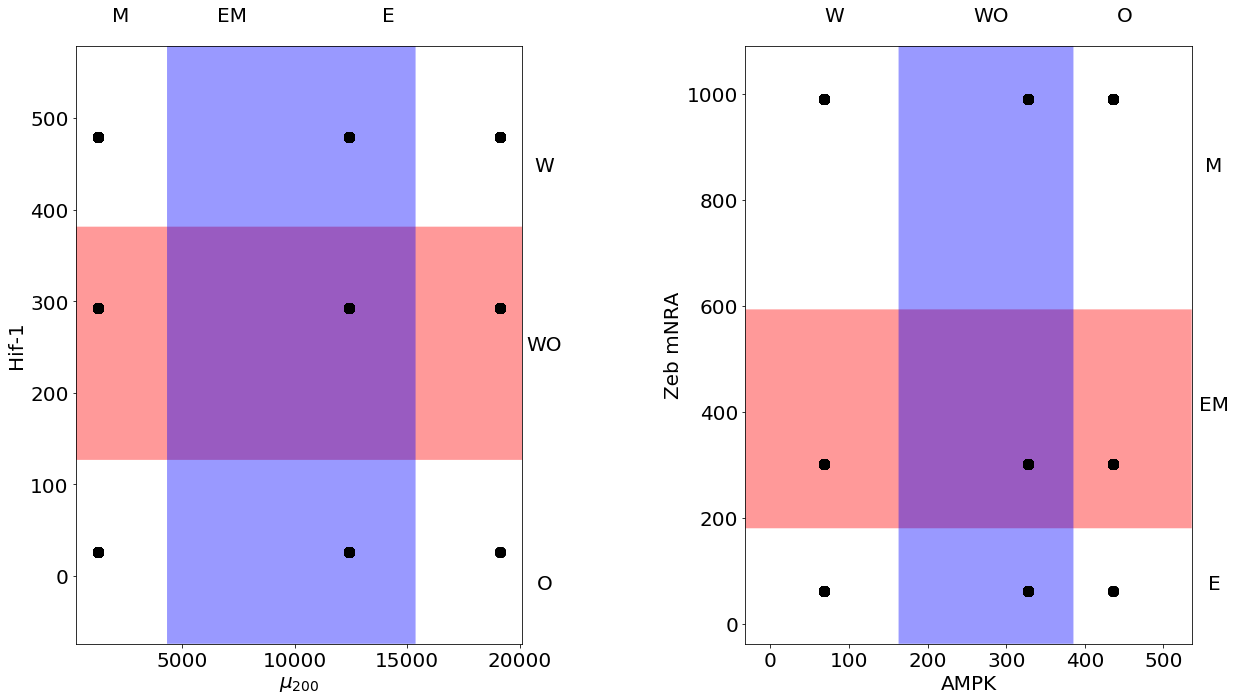

EMT_MR_comp_2_10000_.png
EMT_MR_comp_6_5000.png
EMT_MR_comp_5_2000_res.txt


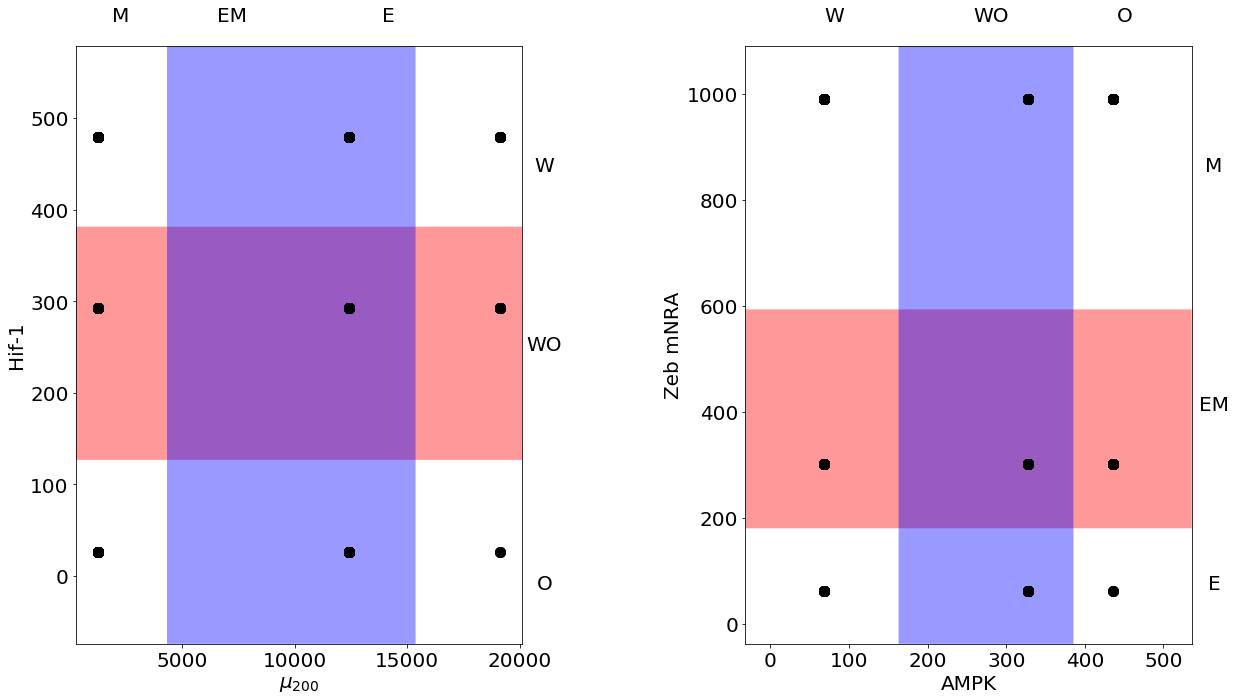

EMT_MR_comp_1_10000_.png
EMT_MR_comp_4_2000_res.txt


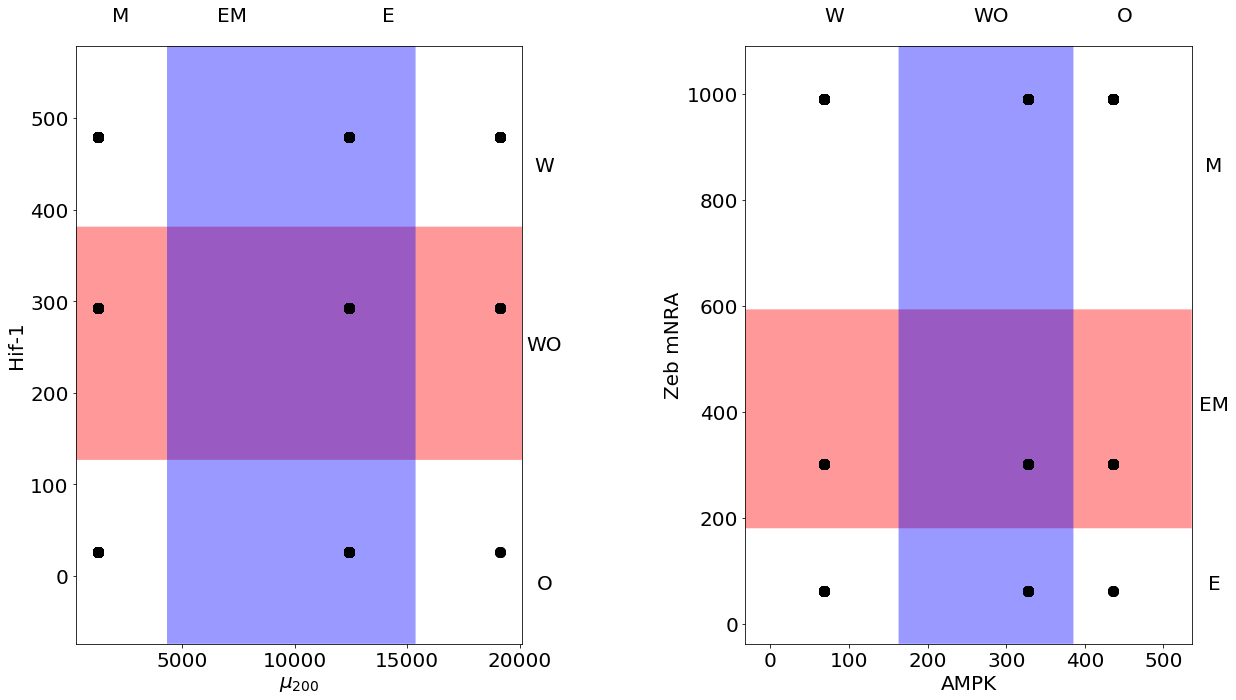

EMT_MR_comp_8_500_ics.txt
EMT_MR_comp_0_500_ics.txt
EMT_MR_comp_6_500_res.txt


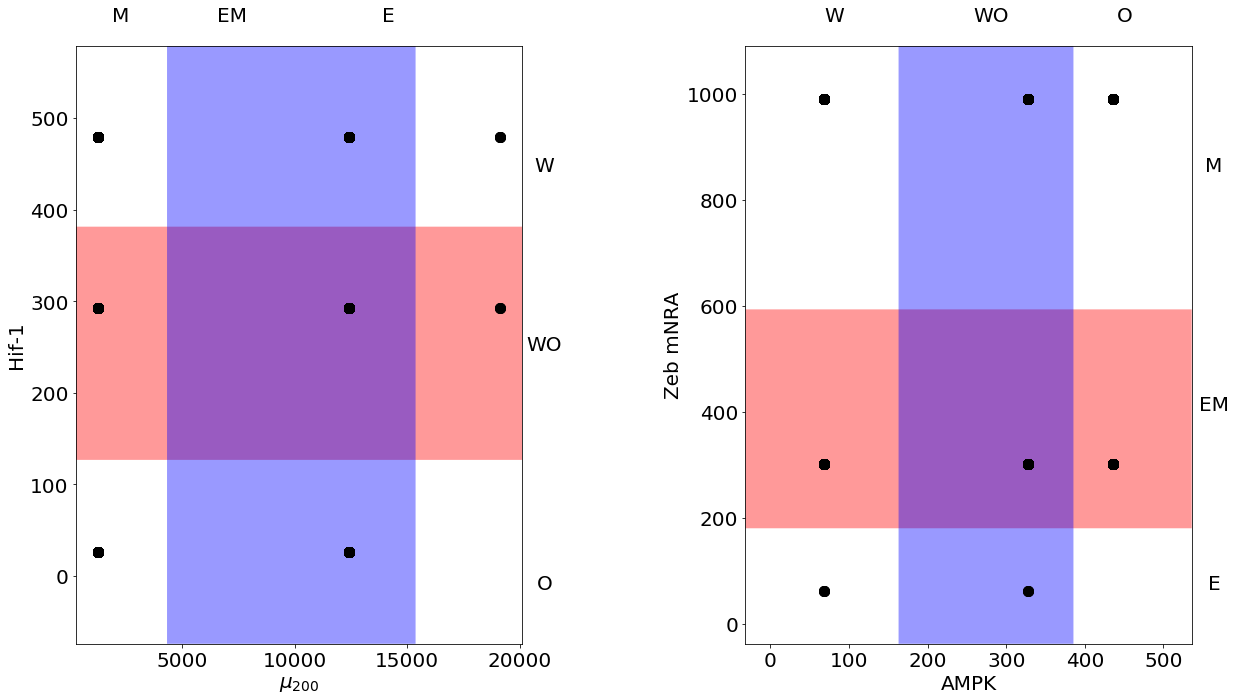

EMT_MR_comp_5_100_ics.txt
EMT_MR_comp_8_100_ics.txt
EMT_MR_comp_5_5000_ics.txt
EMT_MR_comp_2_10000_ics.txt
EMT_MR_comp_2_500_res.txt


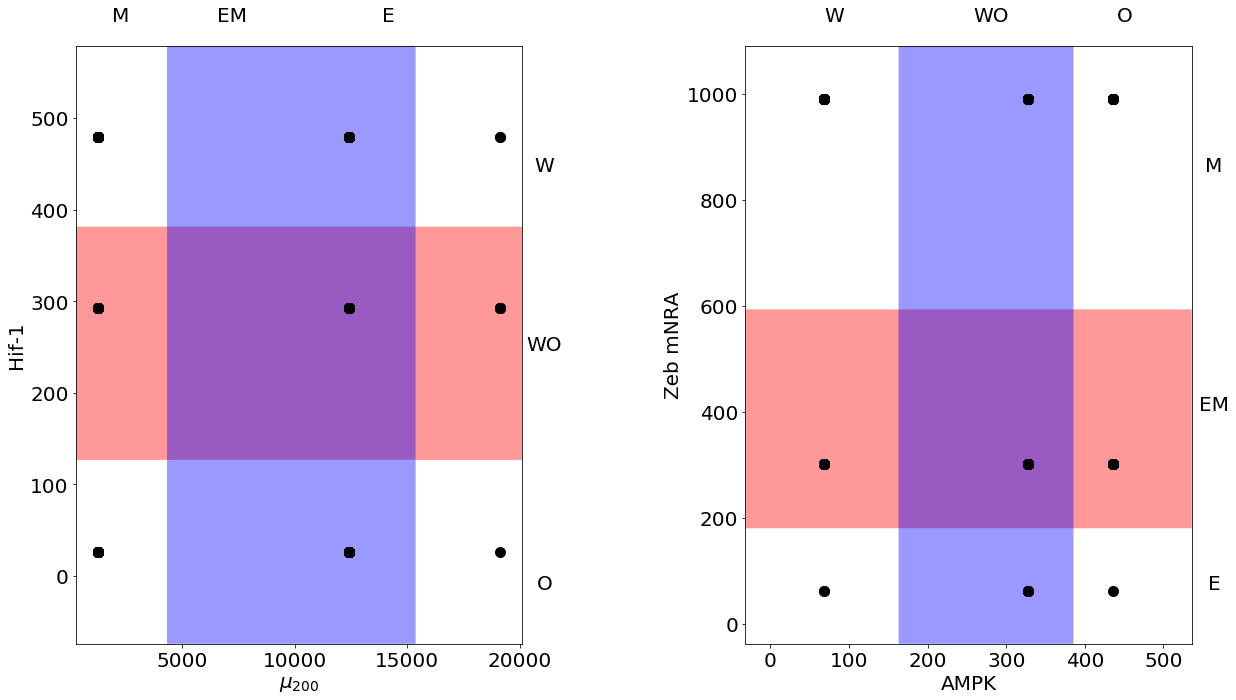

EMT_MR_comp_2_500_ics.txt
EMT_MR_comp_2_1000_res.txt


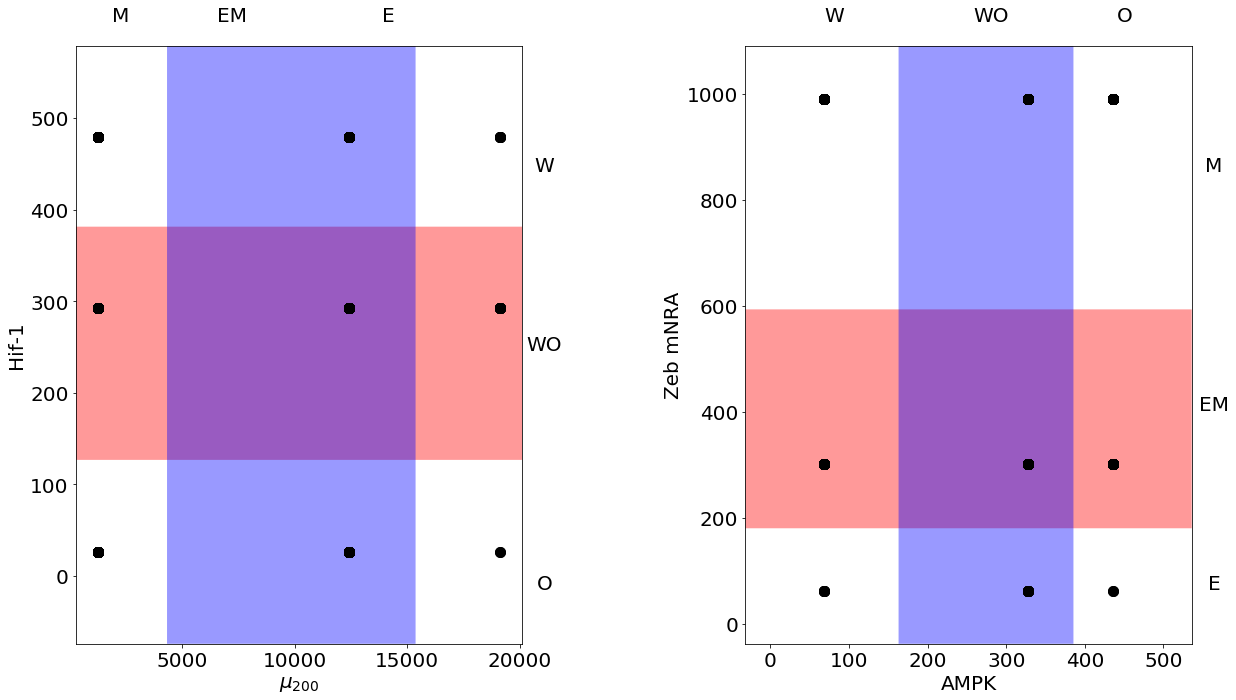

EMT_MR_comp_0_2000_ics.txt
EMT_MR_comp_4_10000.png
EMT_MR_comp_8_5000_res.txt


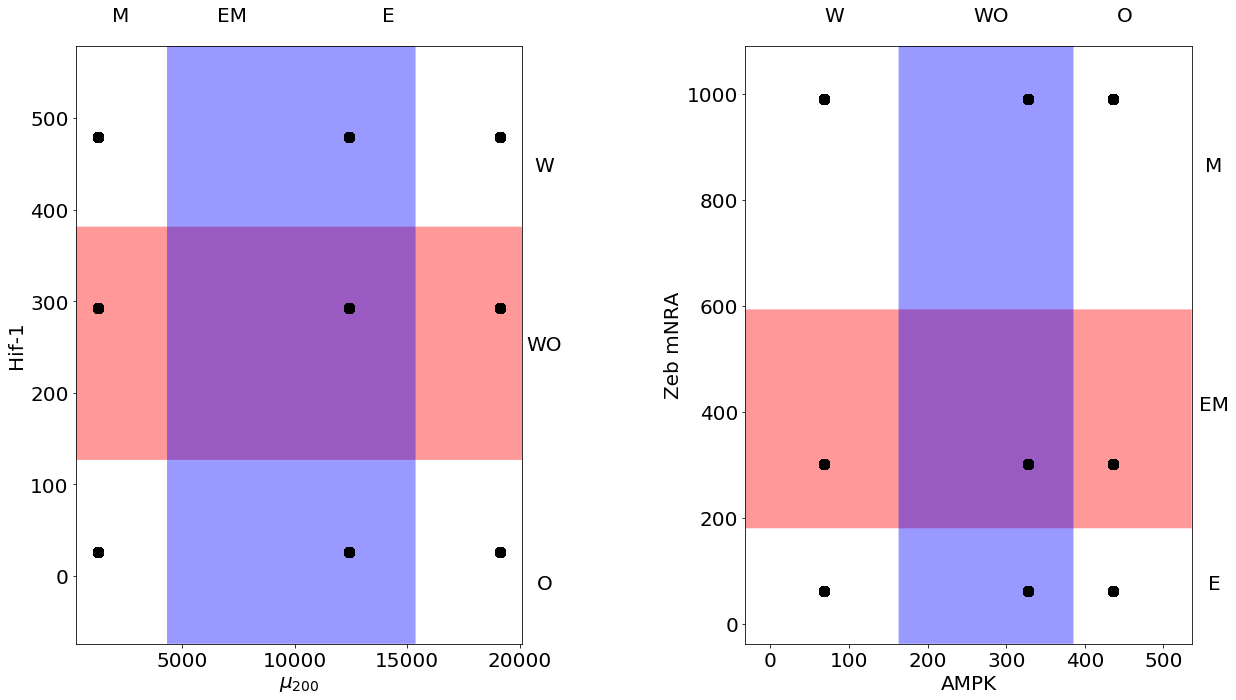

EMT_MR_comp_9_10000_.png
EMT_MR_comp_6_5000_ics.txt
EMT_MR_comp_0_2000.png
EMT_MR_comp_3_2000_.png
EMT_MR_comp_7_1000_res.txt


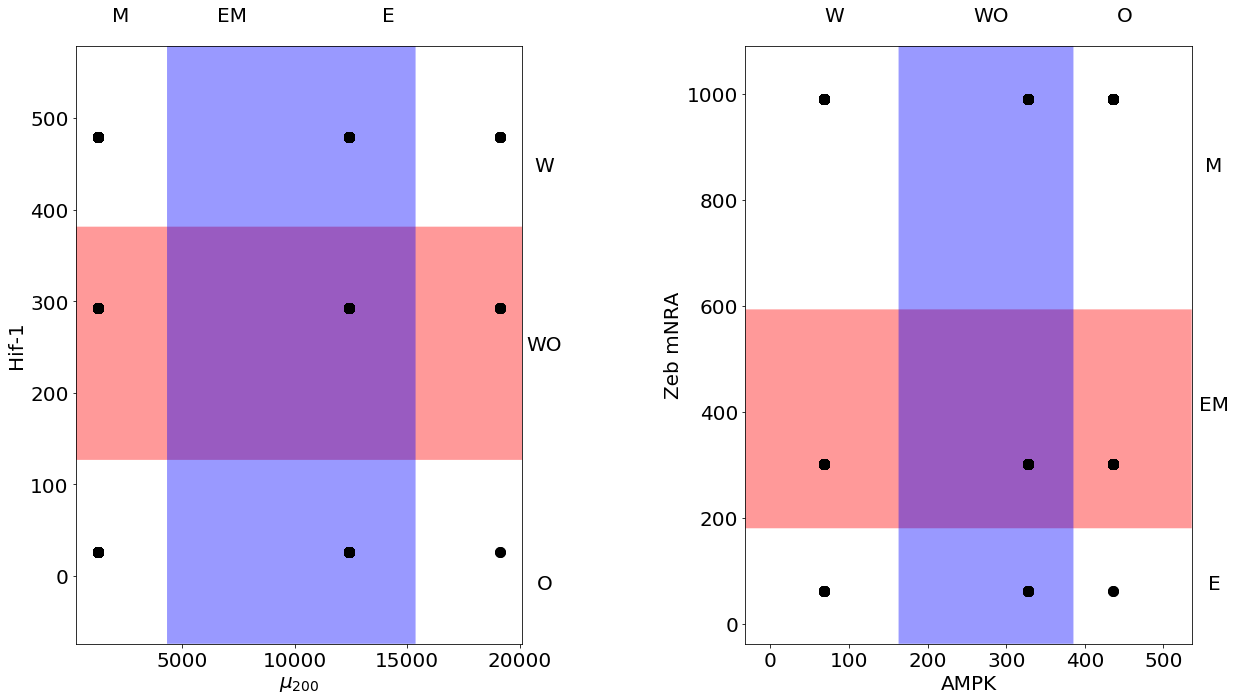

EMT_MR_comp_4_10000_res.txt


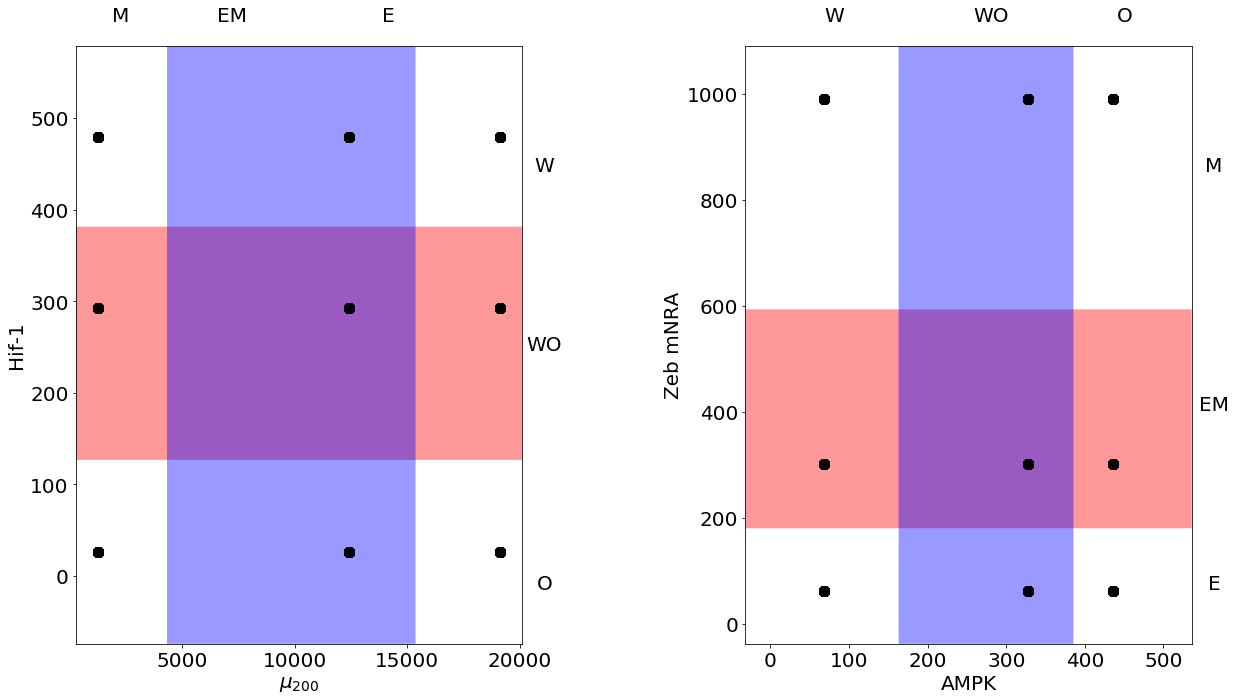

EMT_MR_comp_1_5000_res.txt


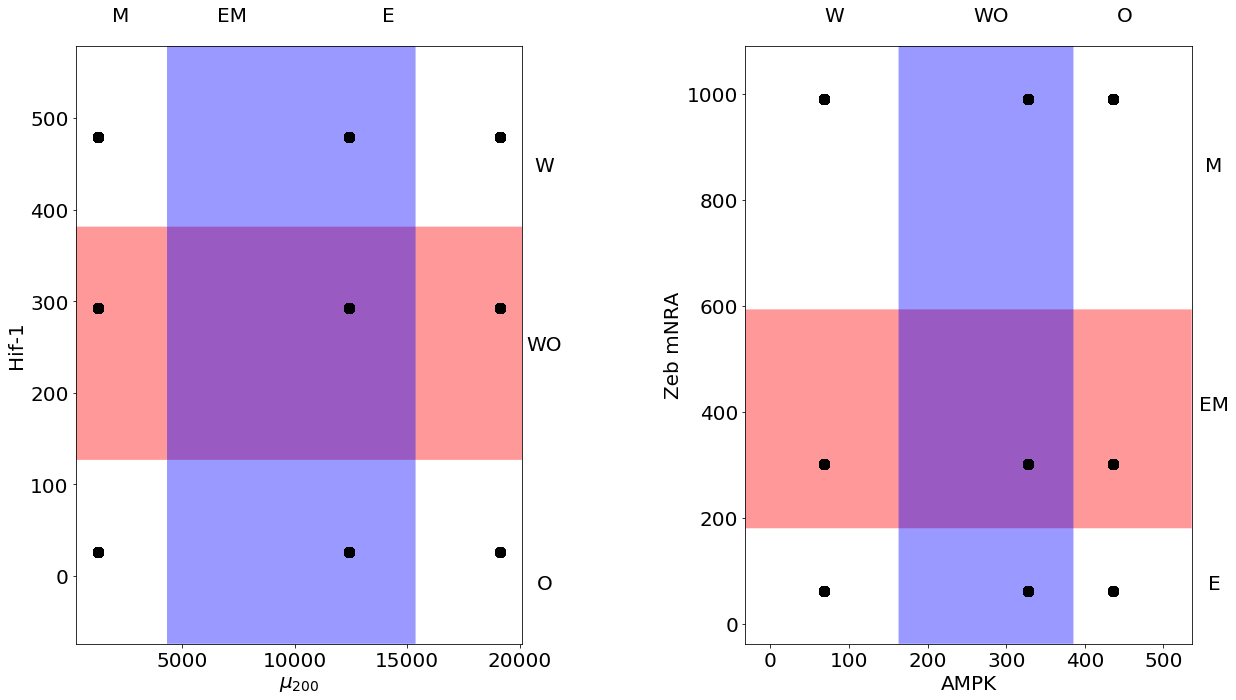

EMT_MR_comp_4_2000.png
EMT_MR_comp_7_5000.png
EMT_MR_comp_10_2000_ics.txt
EMT_MR_comp_10_1000_ics.txt
seedsForSims.txt
EMT_MR_comp_5_500_res.txt


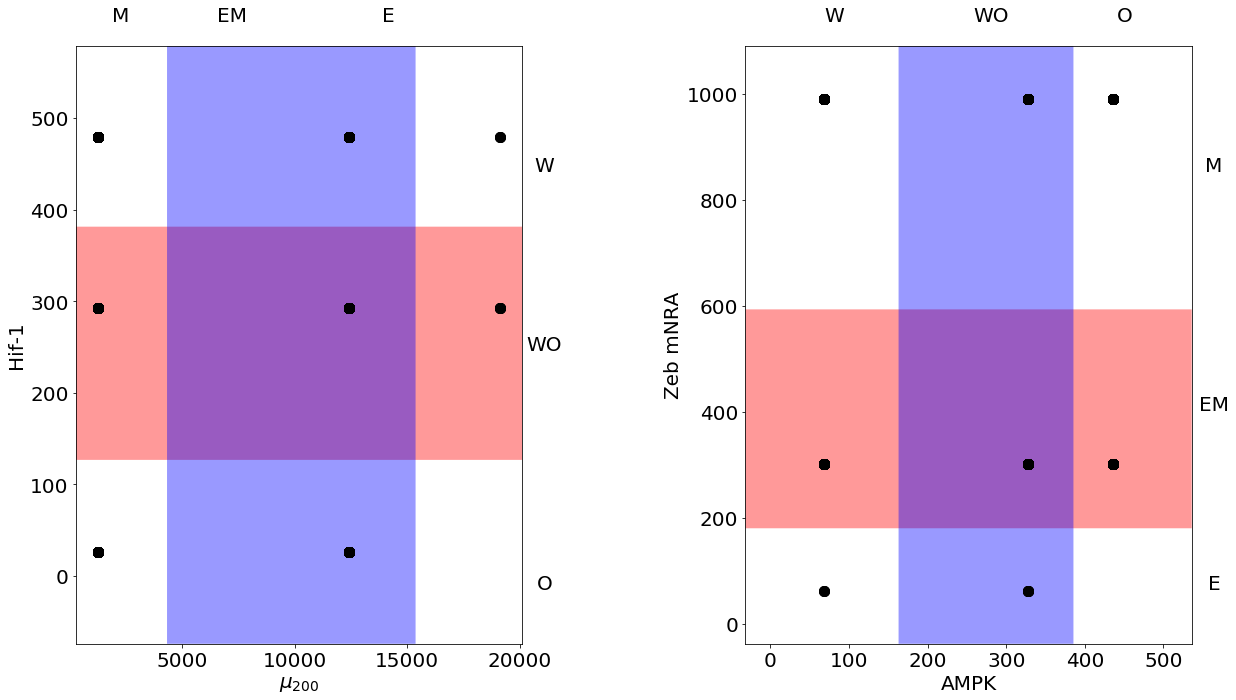

EMT_MR_comp_5_10000.png
EMT_MR_comp_10_500_res.txt


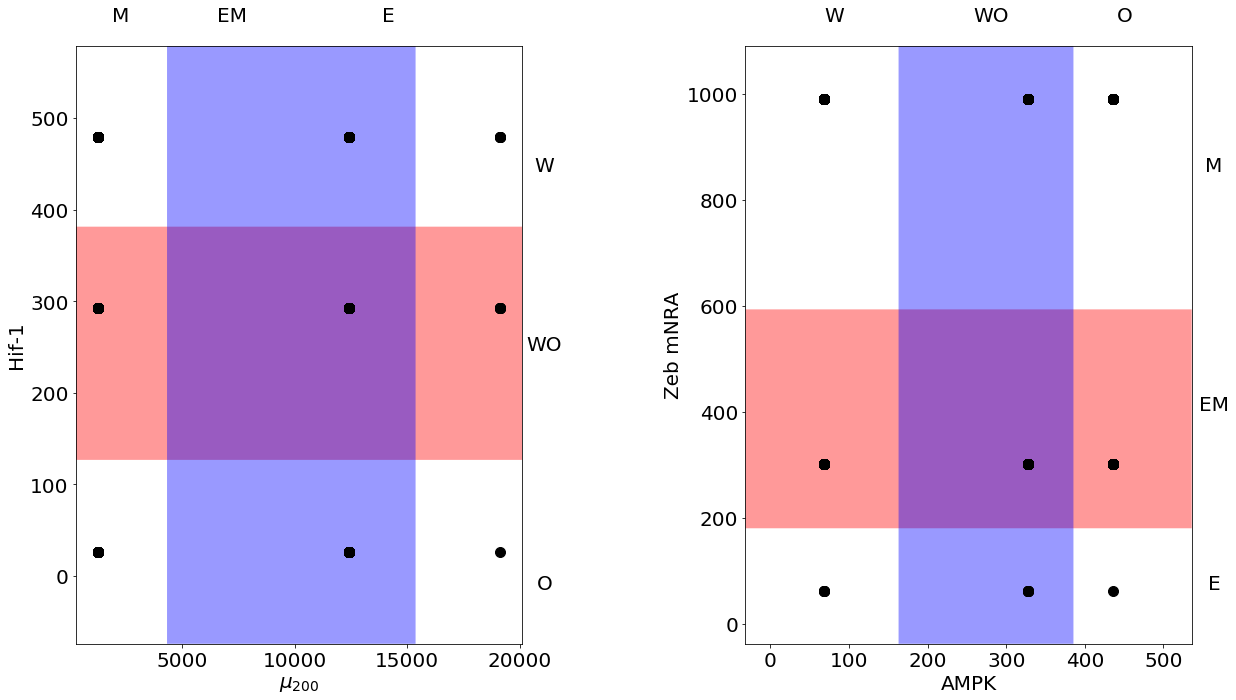

EMT_MR_comp_7_2000_ics.txt
EMT_MR_comp_10_5000_ics.txt
EMT_MR_comp_7_1000_.png
EMT_MR_comp_1_10000_ics.txt
EMT_MR_comp_8_5000.png
EMT_MR_comp_9_5000_res.txt


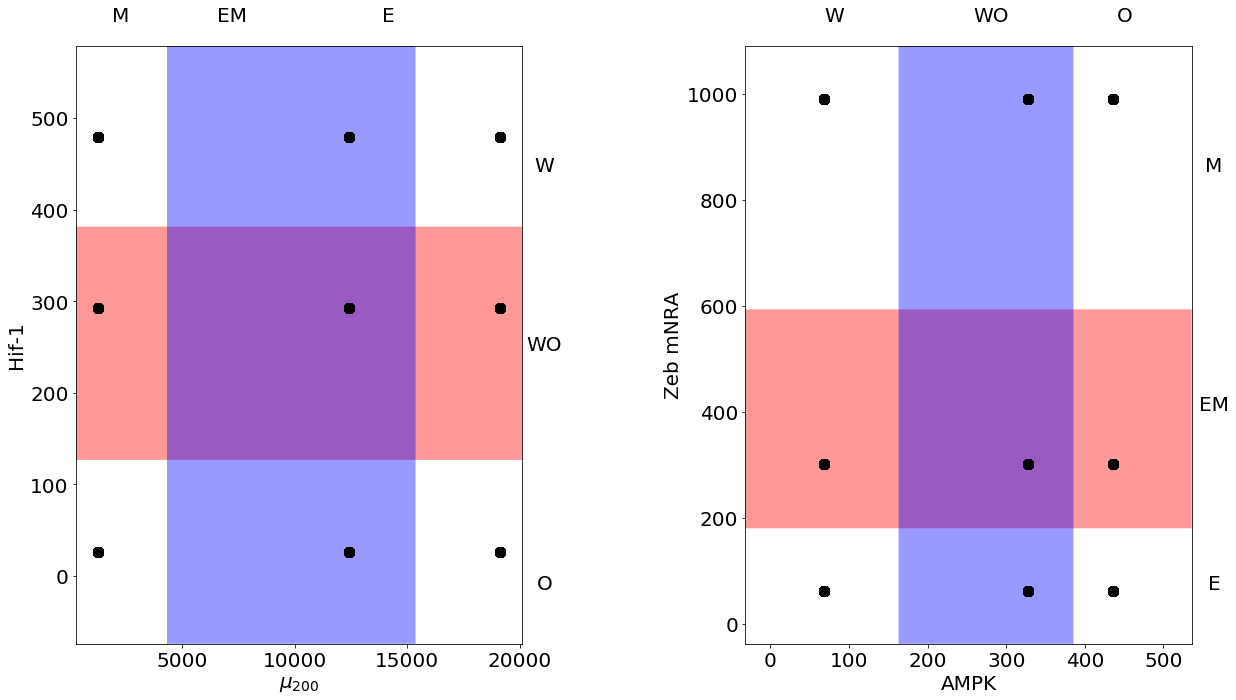

In [8]:
direct = "../coupledWReg_Ccode/crosstalk_comparison/"
regs={}
for filen in os.listdir(direct):
    print filen
    if "res.txt" in filen:
        plotValuesEMTvMR(pd.read_csv(direct+filen).dropna(),stateThresholds())
        amount= filen.split(".")[0].split("_")[4]

        if amount not in regs.keys():
            regs[amount]=[]
        regs[amount]+=[filen]


In [9]:
def plotCompAll(regs):

    results={'E/O':[[],[],[]],'E/W':[[],[],[]],'E/WO':[[],[],[]],'EM/O':[[],[],[]],'EM/W':[[],[],[]],'EM/WO':[[],[],[]],'M/O':[[],[],[]],'M/W':[[],[],[]],'M/WO':[[],[],[]]}
    resultsSum={'E':[[],[],[]],'EM':[[],[],[]],'M':[[],[],[]],'O':[[],[],[]],'WO':[[],[],[]],'W':[[],[],[]]}
    for name in regs:
        tmpE={'E/O':[],'E/W':[],'E/WO':[],'EM/O':[],'EM/W':[],'EM/WO':[],'M/O':[],'M/W':[],'M/WO':[]}
        tmpS={'E':[],'EM':[],'M':[],'O':[],'WO':[],'W':[]}
        for sim in range(len(regs[name])):

            df = pd.read_csv("../coupledWReg_Ccode/crosstalk_comparison/"+regs[name][sim]).dropna()

            mapRes,maxC =getStates(df,stateThresholds())
            for k in results:
                tmp = k
                if sim==0:
                    results[tmp][0]+=[int(name)]
                    tmpE[tmp] += [mapRes[k]/float(name)*100.]
                else:
                    tmpE[tmp] += [mapRes[k]/float(name)*100.]
            for k in resultsSum:
                tmp = k
                if sim==0:
                    resultsSum[tmp][0]+=[int(name)]
                    tmpS[tmp] += [mapRes[k]/float(name)*100.]
                else:
                    tmpS[tmp] += [mapRes[k]/float(name)*100.]



        for k in results:
            results[k][1]+= [np.mean(tmpE[k])]
            results[k][2]+= [np.std(tmpE[k])]

        for k in resultsSum:
            resultsSum[k][1]+= [np.mean(tmpS[k])]
            resultsSum[k][2]+= [np.std(tmpS[k])]
        

    for k in results:
        ind = np.argsort(results[k][0])
        results[k][0] = np.array(results[k][0])[ind]
        results[k][1] = np.array(results[k][1])[ind]
        results[k][2] = np.array(results[k][2])[ind]
    for k in resultsSum:
        ind = np.argsort(resultsSum[k][0])
        resultsSum[k][0] = np.array(resultsSum[k][0])[ind]
        resultsSum[k][1] = np.array(resultsSum[k][1])[ind]
        resultsSum[k][2] = np.array(resultsSum[k][2])[ind]

    plotCoupled(results)
    plotStateSum(resultsSum)


/home/madeline/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


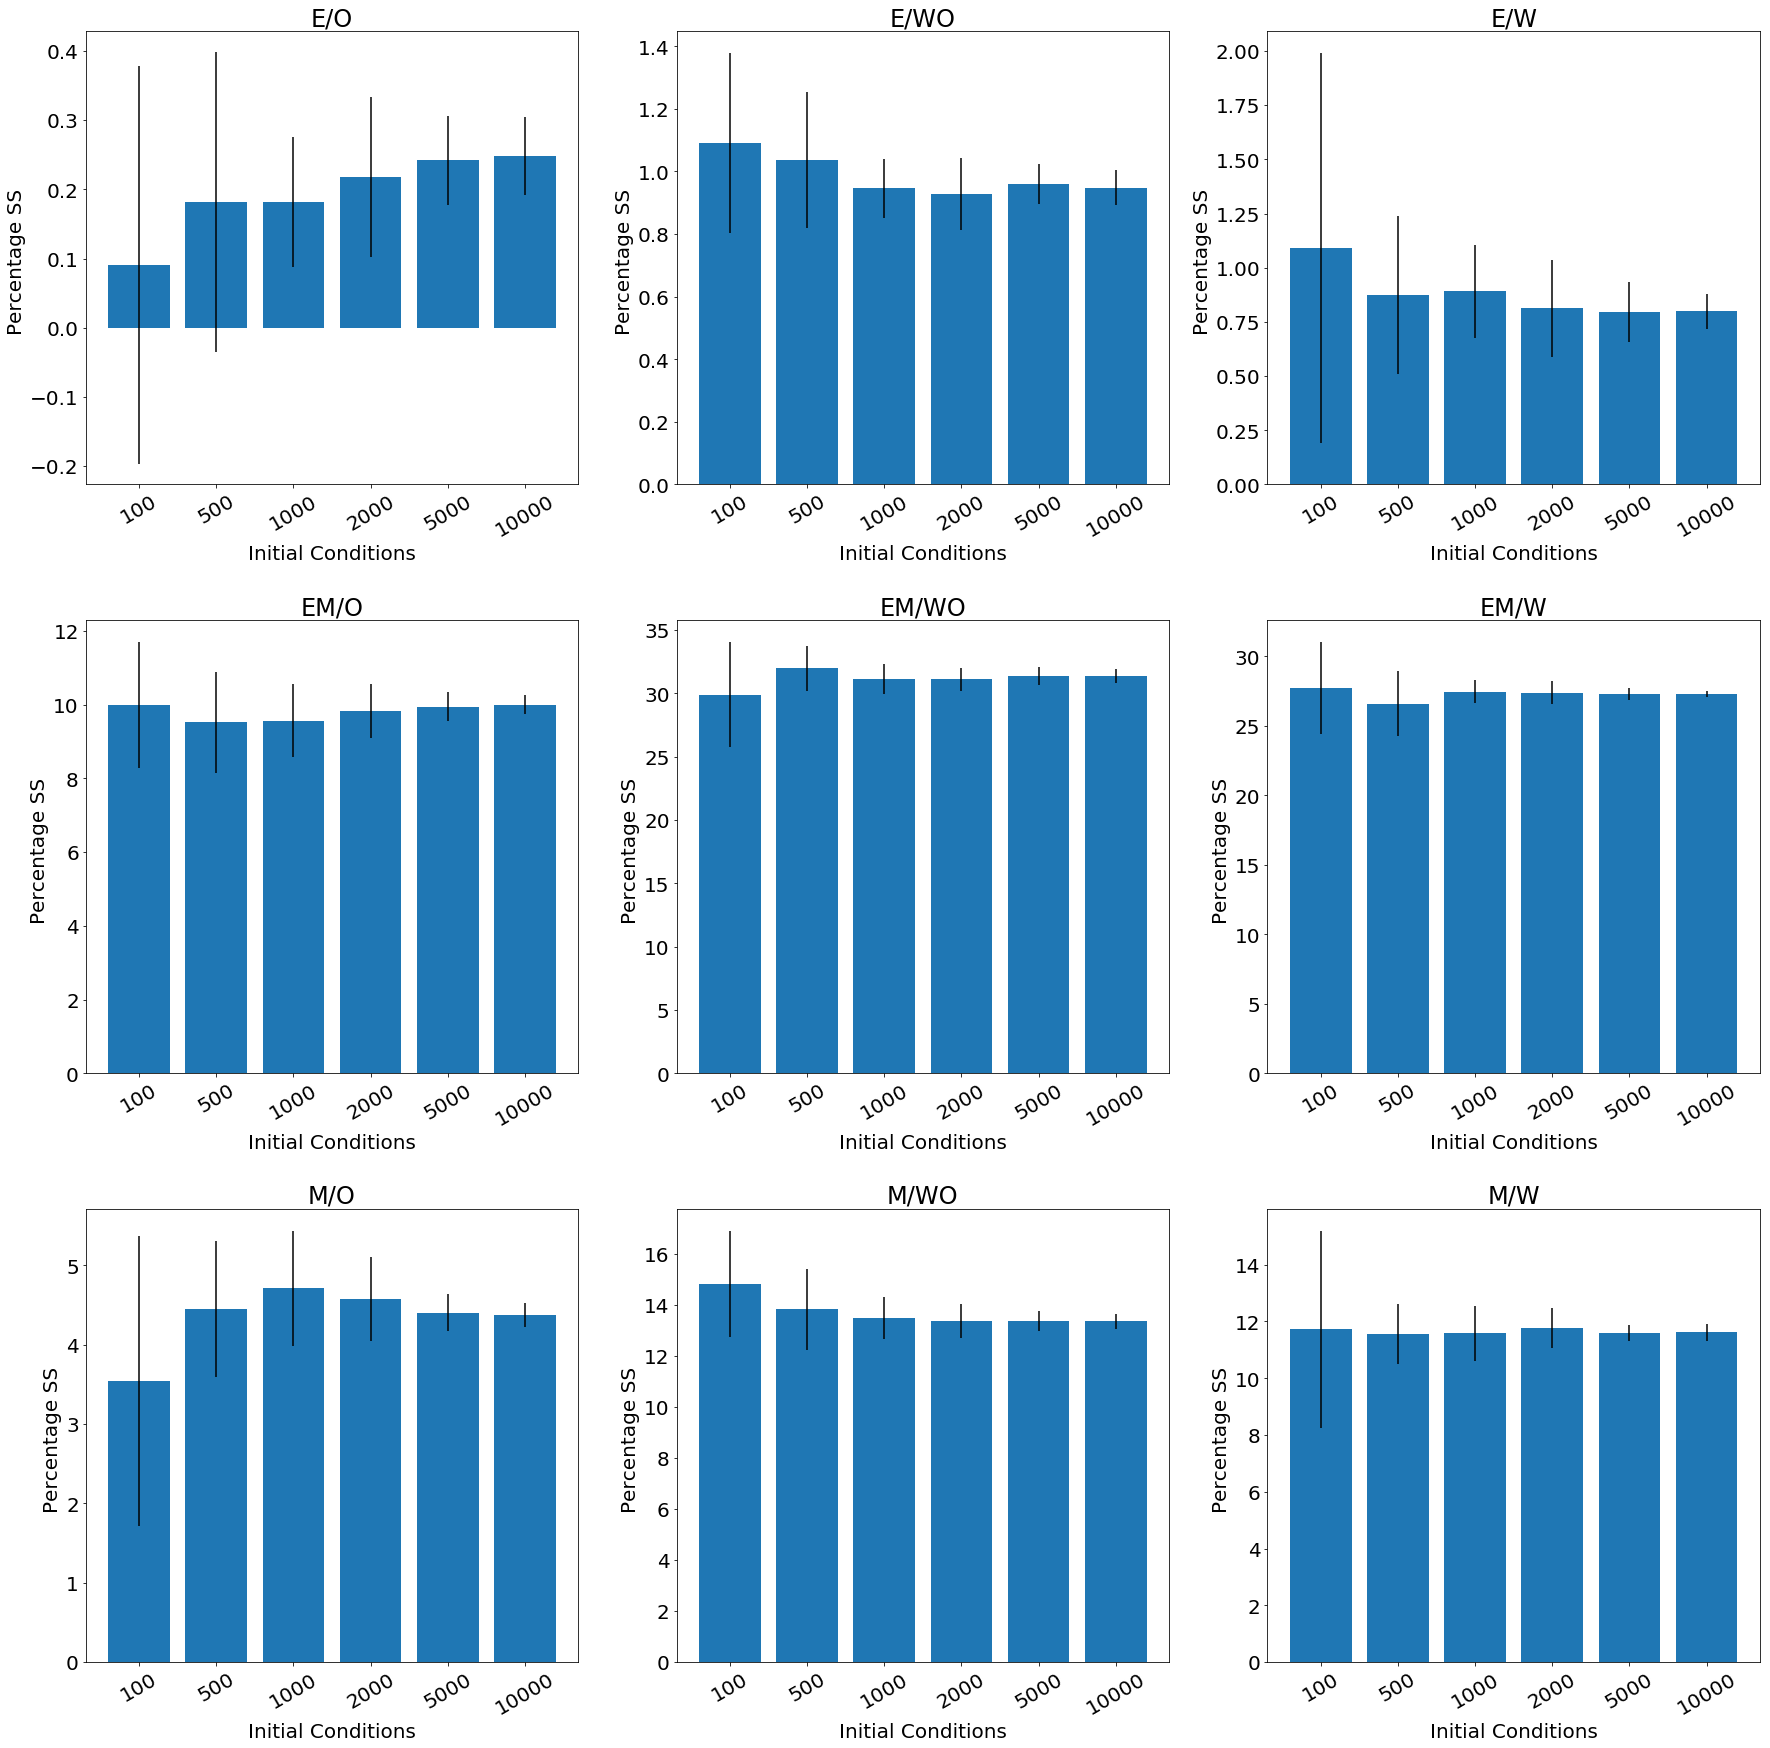

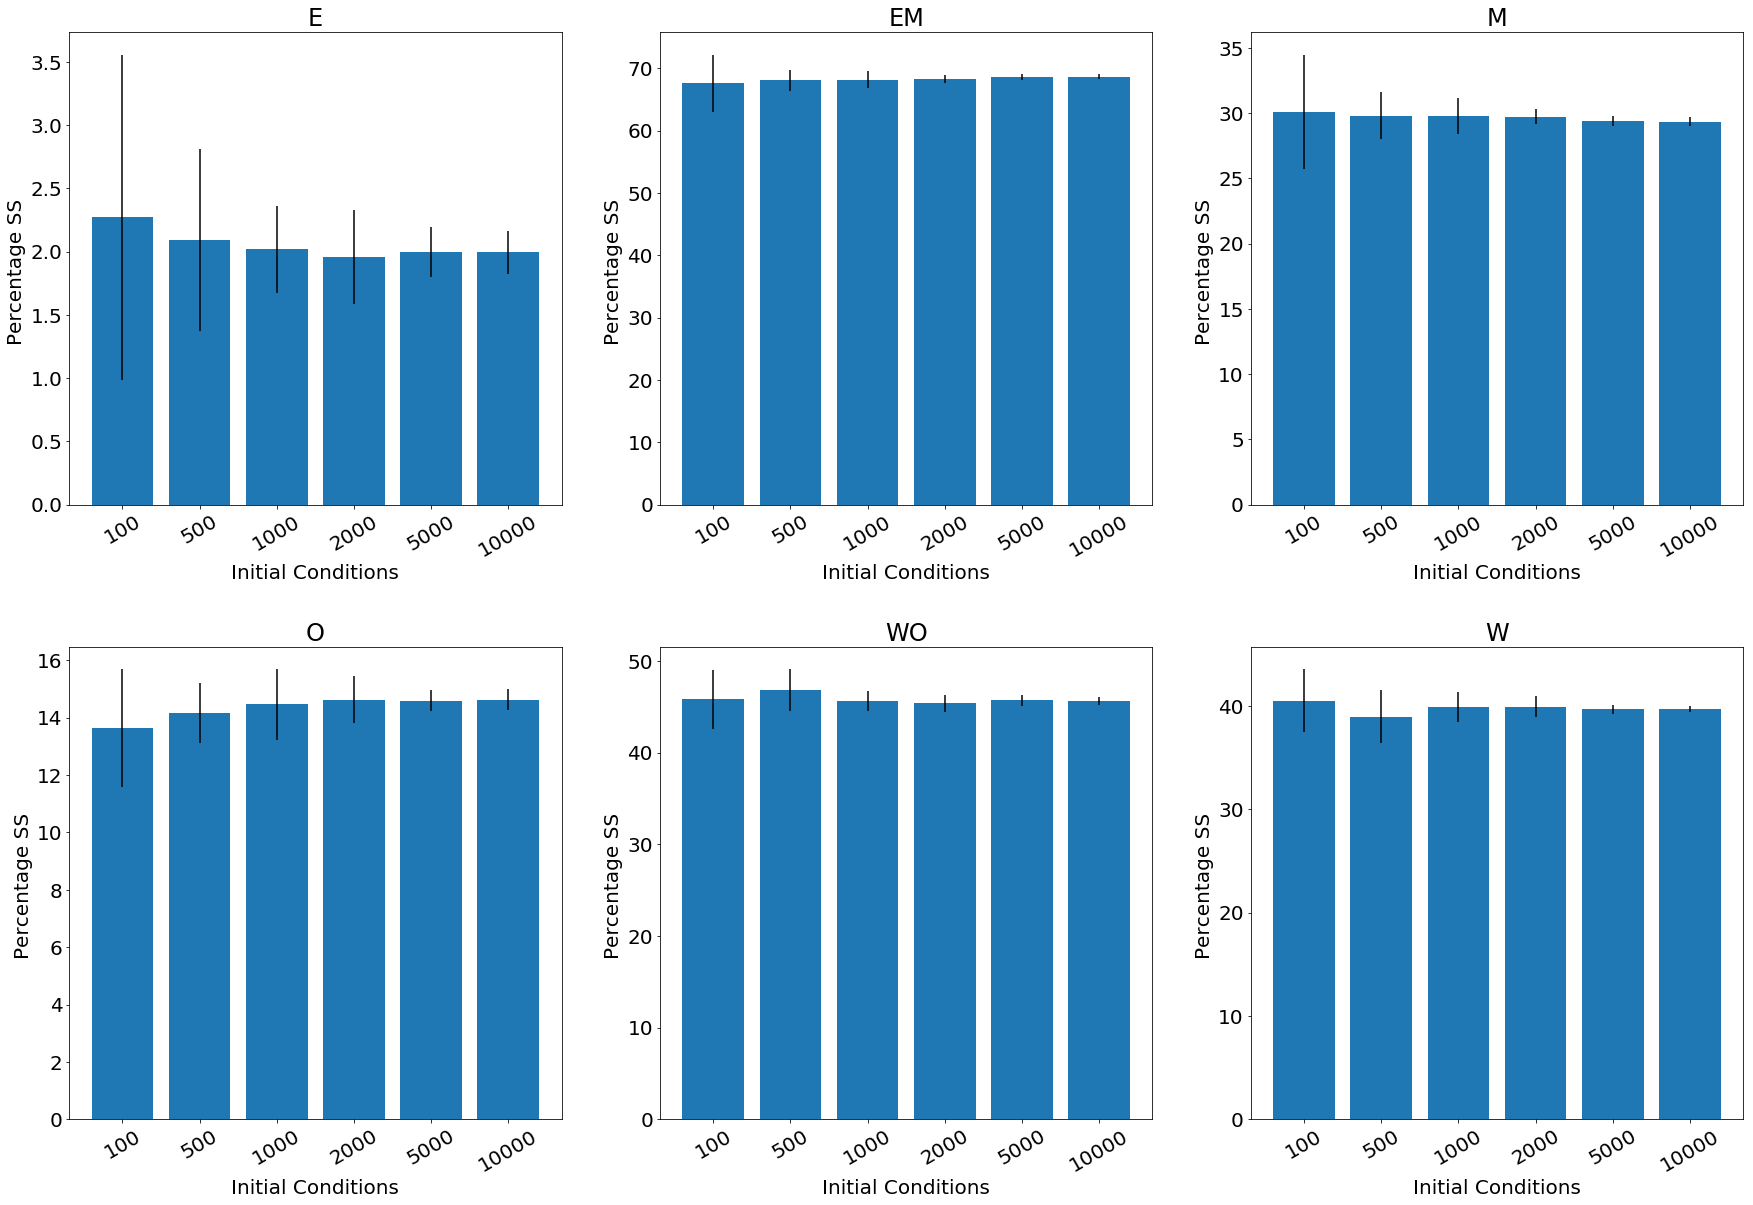

In [10]:
plotCompAll(regs)